## Credit EDA Case Study

### By Tushar Prasad

**Business Understanding:**
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

**Business Objectives:**
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment.

# Importing packages

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Inputting data and initial observations

In [3]:
df = pd.read_csv('application_data.csv')

In [4]:
df.head() ## First 5 values

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.shape ## No of rows and columns

(307511, 122)

In [6]:
df.columns.values ## Columns to observe

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [7]:
df.describe() ## Descriptive analysis of numerical columns

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
df.isna().sum().sort_values(ascending=False).head(60)  ## Checking the null values

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_AVG        

# Data Cleaning

### Removing all columns where the number of null values exceed 50% of the total values

In [9]:
x = len(df)/2
x

153755.5

In [10]:
df.columns[ df.isnull().sum() < x ]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
     

In [11]:
len(df.columns[ df.isnull().sum() < x ])

81

In [12]:
df = df[df.columns[ df.isnull().sum() < x ]]
df.shape

(307511, 81)

## Fixing the remaining columns having null values

#### Since this is just EDA, it is not necessary to impute values in the columns. Here we are mentioning which methods should be used to fix those columns

In [13]:
nulls = df.isnull().sum()
nulls[nulls>0].sort_values(ascending=False)

FLOORSMAX_MEDI                  153020
FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
NAME_TYPE_SUITE                   1292
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [14]:
df_missing = df.count()/len(df)

In [15]:
df_missing = (1-df_missing)*100
df_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

### Fixing FLOORSMAX_AVG

0    0.1667
dtype: float64
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64


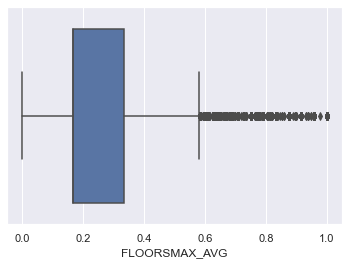

In [16]:
print(df['FLOORSMAX_AVG'].mode())

print(df['FLOORSMAX_AVG'].describe())

sns.boxplot(df['FLOORSMAX_AVG']);

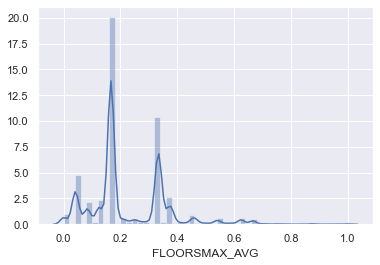

In [17]:
sns.distplot(df['FLOORSMAX_AVG']);

#### Points to be noted
1. This is numeric variable.
2. It has a lot of outliers.
3. Mode & Median are far from the mean.

#### Due to these reasons, I would impute the missing values with Median since imputing with mean can skew the data due to large amount of outliers

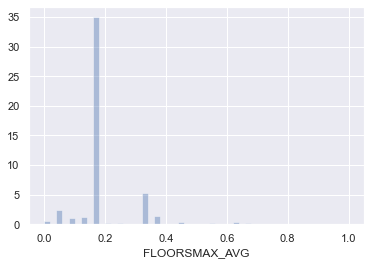

In [18]:
df['FLOORSMAX_AVG'].fillna(df['FLOORSMAX_AVG'].median(), inplace=True)

df['FLOORSMAX_AVG'].isna().sum()

sns.distplot(df['FLOORSMAX_AVG']);

### Fixing FLOORSMAX_MEDI

0    0.1667
dtype: float64
count    154491.000000
mean          0.225897
std           0.145067
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MEDI, dtype: float64


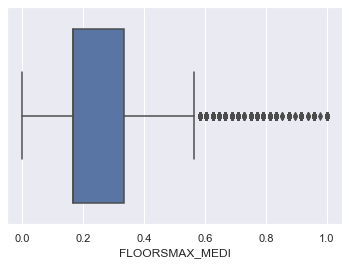

In [19]:
print(df['FLOORSMAX_MEDI'].mode())

print(df['FLOORSMAX_MEDI'].describe())

sns.boxplot(df['FLOORSMAX_MEDI']);

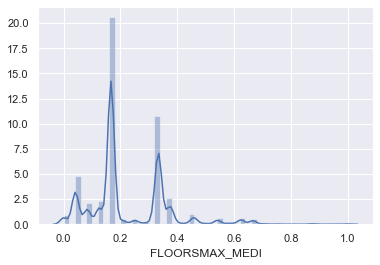

In [20]:
sns.distplot(df['FLOORSMAX_MEDI']);

#### Points to be noted
1. This is numeric variable.
2. It doesn't have a lot of outliers.
3. Mode & Median are far from the mean.

#### Due to these reasons, I would impute the missing values with the mean since imputing with mean wont skew the data due to small amount of outliers

0


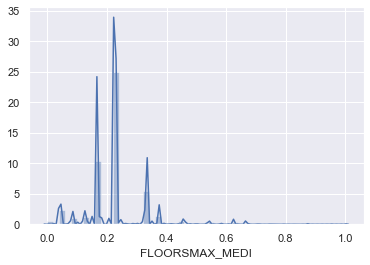

In [21]:
df['FLOORSMAX_MEDI'].fillna(df['FLOORSMAX_MEDI'].mean(), inplace=True)

print(df['FLOORSMAX_MEDI'].isna().sum())

sns.distplot(df['FLOORSMAX_MEDI']);

### Fixing FLOORSMAX_MODE

0    0.1667
dtype: float64
count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64


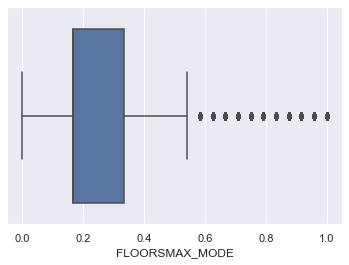

In [22]:
col_name = 'FLOORSMAX_MODE'

print(df[col_name].mode())

print(df[col_name].describe())

sns.boxplot(df[col_name]);

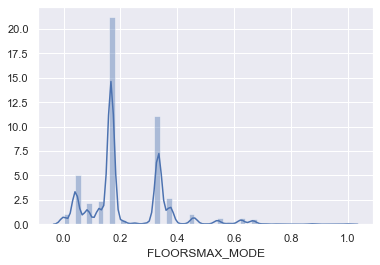

In [23]:
sns.distplot(df[col_name]);

#### Points to be noted
1. This is numeric variable.
2. It doesn't have a lot of outliers.
3. Mode & Median are far from the mean.

#### Due to these reasons, I would impute the missing values with the mean since imputing with mean wont skew the data due to small amount of outliers

0


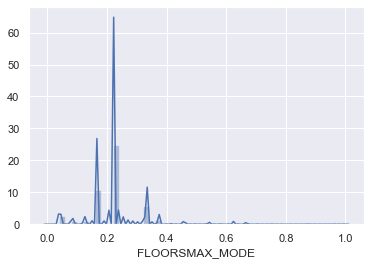

In [24]:
df[col_name].fillna(df[col_name].mean(), inplace=True)

print(df[col_name].isna().sum())

sns.distplot(df[col_name]);

### Fixing YEARS_BEGINEXPLUATATION_AVG 

0    0.9871
dtype: float64
count    157504.000000
mean          0.977735
std           0.059223
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_AVG, dtype: float64


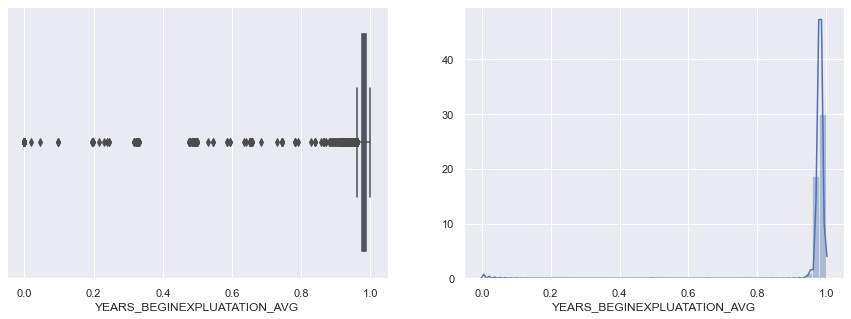

In [25]:
col_name = 'YEARS_BEGINEXPLUATATION_AVG'

print(df[col_name].mode())

print(df[col_name].describe())

fig, axs = plt.subplots(1,2 ,figsize=(15, 5))

sns.boxplot(df[col_name],ax=axs[0]);
sns.distplot(df[col_name],ax=axs[1]);

#### Points to be noted
1. This is numeric variable.
2. It has a lot of outliers.
3. Mode & Median are close to the mean.

#### Due to these reasons, I would impute the missing values with the mean since mean and median are close to each other and it wont make a difference.

In [26]:
df[col_name].fillna(df[col_name].mean(), inplace=True)

print(df[col_name].isna().sum())

0


### Fixing YEARS_BEGINEXPLUATATION_MEDI

0    0.9871
dtype: float64
count    157504.000000
mean          0.977752
std           0.059897
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MEDI, dtype: float64


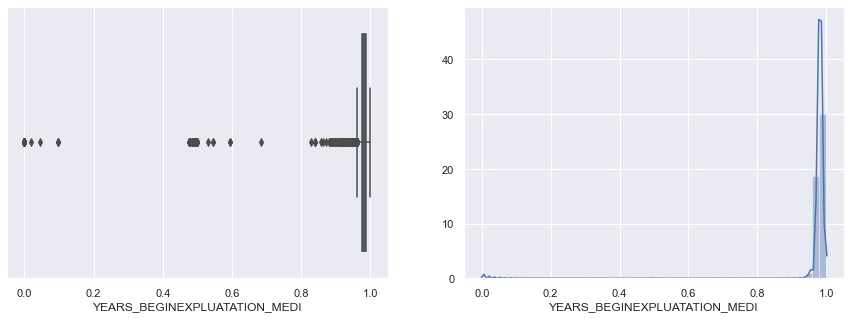

In [27]:
col_name = 'YEARS_BEGINEXPLUATATION_MEDI'

print(df[col_name].mode())

print(df[col_name].describe())

fig, axs = plt.subplots(1,2 ,figsize=(15, 5))

sns.boxplot(df[col_name],ax=axs[0]);
sns.distplot(df[col_name],ax=axs[1]);

#### Points to be noted
1. This is numeric variable.
2. It has a lot of outliers.
3. Mode & Median are close to the mean.

#### Due to these reasons, I would impute the missing values with the mean since mean and median are close to each other and it wont make a difference.

In [28]:
df[col_name].fillna(df[col_name].mean(), inplace=True)

print(df[col_name].isna().sum())

0


### Fixing YEARS_BEGINEXPLUATATION_MODE

0    0.9871
dtype: float64
count    157504.000000
mean          0.977065
std           0.064575
min           0.000000
25%           0.976700
50%           0.981600
75%           0.986600
max           1.000000
Name: YEARS_BEGINEXPLUATATION_MODE, dtype: float64


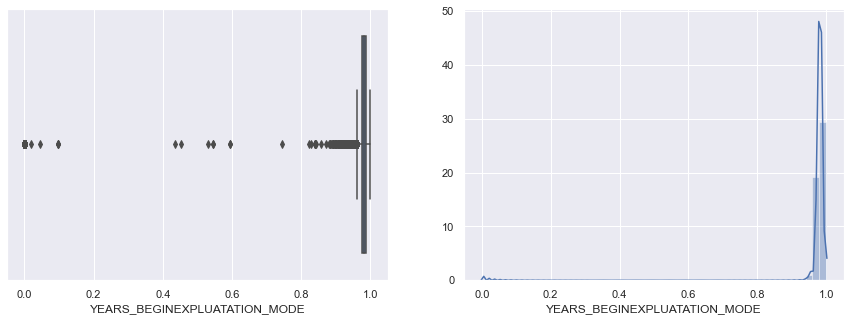

In [29]:
col_name = 'YEARS_BEGINEXPLUATATION_MODE'

print(df[col_name].mode())

print(df[col_name].describe())

fig, axs = plt.subplots(1,2 ,figsize=(15, 5))

sns.boxplot(df[col_name],ax=axs[0]);
sns.distplot(df[col_name],ax=axs[1]);

#### Points to be noted
1. This is numeric variable.
2. It has a lot of outliers.
3. Mode & Median are close to the mean.

#### Due to these reasons, I would impute the missing values with the mean since mean and median are close to each other and it wont make a difference.

In [30]:
df[col_name].fillna(df[col_name].mean(), inplace=True)

print(df[col_name].isna().sum())

0


### Fixing TOTALAREA_MODE

0    0.0
dtype: float64
count    159080.000000
mean          0.102547
std           0.107462
min           0.000000
25%           0.041200
50%           0.068800
75%           0.127600
max           1.000000
Name: TOTALAREA_MODE, dtype: float64


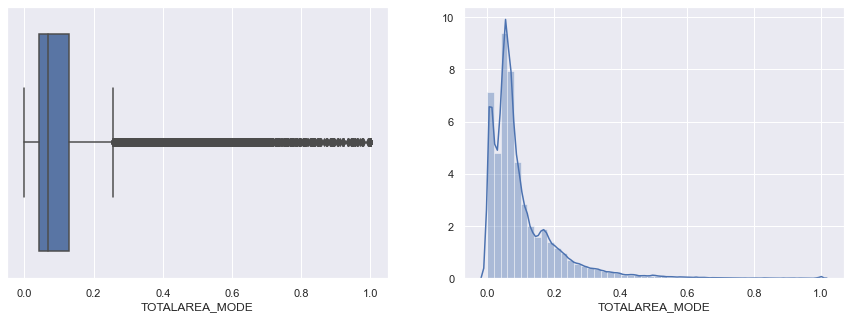

In [31]:
col_name = 'TOTALAREA_MODE'

print(df[col_name].mode())

print(df[col_name].describe())

fig, axs = plt.subplots(1,2 ,figsize=(15, 5))

sns.boxplot(df[col_name],ax=axs[0]);
sns.distplot(df[col_name],ax=axs[1]);

#### Points to be noted
1. This is numeric variable.
2. It has a lot of outliers.
3. Mode & Median are far from the mean.

#### Due to these reasons, I would impute the missing values with the median since importing with mean might skew the values due to outliers

In [32]:
df[col_name].fillna(df[col_name].median(), inplace=True)

print(df[col_name].isna().sum())

0


### Fixing EMERGENCYSTATE_MODE

In [33]:
col_name = 'EMERGENCYSTATE_MODE'

print(df[col_name].unique())

print(df[col_name].mode())

print(df[col_name].describe())

print(df[col_name].value_counts(normalize=True))

['No' nan 'Yes']
0    No
dtype: object
count     161756
unique         2
top           No
freq      159428
Name: EMERGENCYSTATE_MODE, dtype: object
No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64


#### Points to be noted:-
1. The is a categorical column.
2. Data is heavily skewed towards No (98.5%)

#### Hence, we can impute the null values with the mode which is No

In [34]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


### Fixing OCCUPATION_TYPE

['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
0    Laborers
dtype: object
count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff             

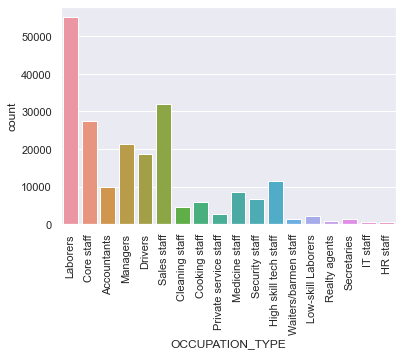

In [35]:
col_name = 'OCCUPATION_TYPE'

print(df[col_name].unique())

print(df[col_name].mode())

print(df[col_name].describe())

print(df[col_name].value_counts(normalize=True))

sns.countplot(x=col_name, data=df)
plt.xticks(rotation=90);

### Points to be Noted
1. It is a categorical column
2. Even though Labourers has the highest value, the data is not heavily skewed towards it. 

#### Hence, we can't impute null values with the mode as it might skew the data and show a wrong representation

### FIXING EXT_SOURCE_3

0    0.7463
dtype: float64
count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


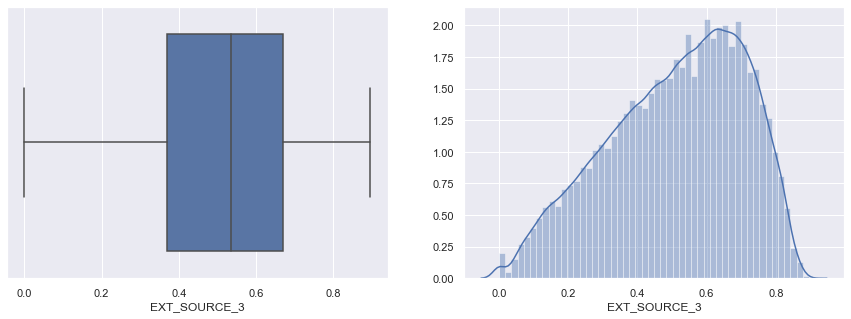

In [36]:
col_name = 'EXT_SOURCE_3'

print(df[col_name].mode())

print(df[col_name].describe())

fig, axs = plt.subplots(1,2 ,figsize=(15, 5))

sns.boxplot(df[col_name],ax=axs[0]);
sns.distplot(df[col_name],ax=axs[1]);

### Points to be noted:-
1. It is a numerical column.
2. The mean and median are close to each other.
3. There arent any outliers.

#### Hence, we can impute the null values with the mean as the outliers wont skew the data.

In [37]:
df[col_name].fillna(df[col_name].mean(), inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_YEAR

0    0.0
dtype: float64


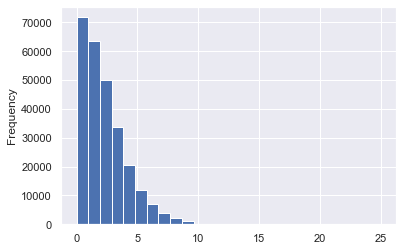

In [38]:
col_name = 'AMT_REQ_CREDIT_BUREAU_YEAR'
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);


### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [39]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_QRT

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0    0.0
dtype: float64


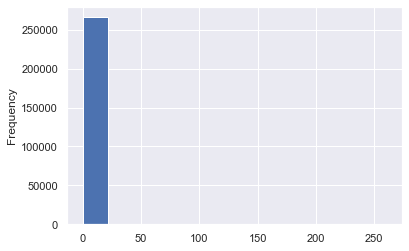

In [40]:
col_name = 'AMT_REQ_CREDIT_BUREAU_QRT'
print(df[col_name].describe())
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);


### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [41]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_HOUR

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
0    0.0
dtype: float64


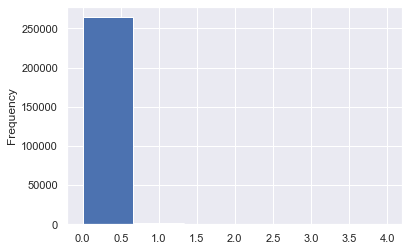

In [42]:
col_name = 'AMT_REQ_CREDIT_BUREAU_HOUR'
print(df[col_name].describe())
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);

### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [43]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_DAY

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
dtype: float64


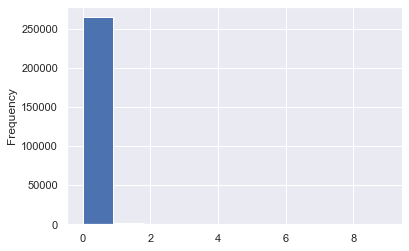

In [44]:
col_name = 'AMT_REQ_CREDIT_BUREAU_DAY'
print(df[col_name].describe())
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);

### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [45]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_WEEK

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0    0.0
dtype: float64


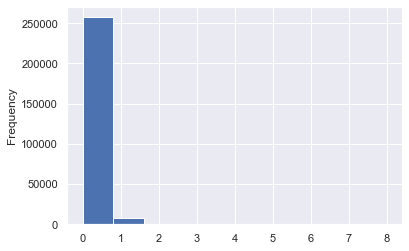

In [46]:
col_name = 'AMT_REQ_CREDIT_BUREAU_WEEK'
print(df[col_name].describe())
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);

### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [47]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


## Fixing AMT_REQ_CREDIT_BUREAU_MON

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
dtype: float64


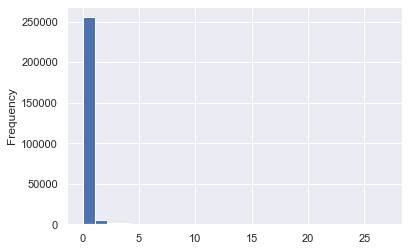

In [48]:
col_name = 'AMT_REQ_CREDIT_BUREAU_MON'
print(df[col_name].describe())
x = len(df[col_name].unique())
print(df[col_name].mode())
df[col_name].plot.hist(bins=x);

### Points to be noted:-
1. Its a ordinal categorical variable.
2. The graph is skewed towards 0 which is also the mode.
3. Logically it doesn't make sense to take Mean or Median values since its not continuous.
#### Hence, we can impute the values by mode

In [49]:
df[col_name].fillna(df[col_name].mode().values[0], inplace=True)

print(df[col_name].isna().sum())

0


In [50]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

OCCUPATION_TYPE             96391
NAME_TYPE_SUITE              1292
DEF_60_CNT_SOCIAL_CIRCLE     1021
OBS_60_CNT_SOCIAL_CIRCLE     1021
DEF_30_CNT_SOCIAL_CIRCLE     1021
OBS_30_CNT_SOCIAL_CIRCLE     1021
EXT_SOURCE_2                  660
AMT_GOODS_PRICE               278
AMT_ANNUITY                    12
CNT_FAM_MEMBERS                 2
DAYS_LAST_PHONE_CHANGE          1
dtype: int64

## Fixing the rest of columns

### Points to be noted:-

1. The columns left over have a very small amount of null values.
2. We can individually fill them according to logic.
3. We can also choose to drop them since the amount of null values is below 1% in proportion.
4. We have decided to drop them.
5. Only the Opportunity_type column has null values now.

In [51]:
df.shape

(307511, 81)

In [52]:
df = df.dropna(subset = ['AMT_ANNUITY','CNT_FAM_MEMBERS','AMT_GOODS_PRICE','NAME_TYPE_SUITE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE'])

In [53]:
print(307511-304531)

print((307511-304531)*100/307511)
## Only 2980 out of 307511 i.e less than 1% were dropped

2980
0.9690710251015411


# ANALYSIS

In [54]:
# Client with payment difficulties - Defaulters

(df['TARGET']==1).sum()

24667

In [55]:
# Other Clients

(df['TARGET']==0).sum()

279864

In [56]:
## IMBALANCE RATIO

((df['TARGET']==0).sum()) / ((df['TARGET']==1).sum())

11.345684517776787

In [57]:
cat_col = list(set(df.columns) - set(df.describe().columns))
cat_col

['WEEKDAY_APPR_PROCESS_START',
 'NAME_FAMILY_STATUS',
 'EMERGENCYSTATE_MODE',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE']

### Fixing CODE_GENDER XNA Values

In [58]:
print(df['CODE_GENDER'].value_counts())

#### CODE_GENDER has XNA values which doesn't make sense for EDA
#### CODE_GENDER has more Female counts hence we can fill the XNA values with F.
df['CODE_GENDER'].replace('XNA','F',inplace=True)
print(df['CODE_GENDER'].value_counts())

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64
F    200486
M    104045
Name: CODE_GENDER, dtype: int64


### Fixing ORGANIZATION_TYPE XNA Values

In [59]:
df.shape

(304531, 81)

In [60]:
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(54852, 81)

#### 18% of the values in ORGANIZATION_TYPE column belongs to XNA column which doesn't make sense if we are doing EDA for that column. We can drop those rows if we want to but that might hamper the analysis of other columns. So we are not going to drop those.

## Creation of derived variables for some further analysis

### Binning Income values
We have taken the bin differences as 25000 and have taken 21 intervals.

In [61]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
ranges = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=ranges)

### Binning Credit values
We have taken the bin differences as 50000 and have taken 17 intervals

In [62]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
ranges = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=ranges)

## Bivariate analysis of the derived columns

In [63]:
def bivariate_with_gender(df,col_1,col_2):
    fig, ax = plt.subplots()
    fig.set_size_inches(15 , 5)
    plt.xticks(rotation=90)
    plt.yscale('log')
    ax = sns.countplot(data = df, x= col_1,hue=col_2, order=df[col_1].value_counts().index)
    plt.show()
    

### Gender wise Loan Applicants in various income ranges


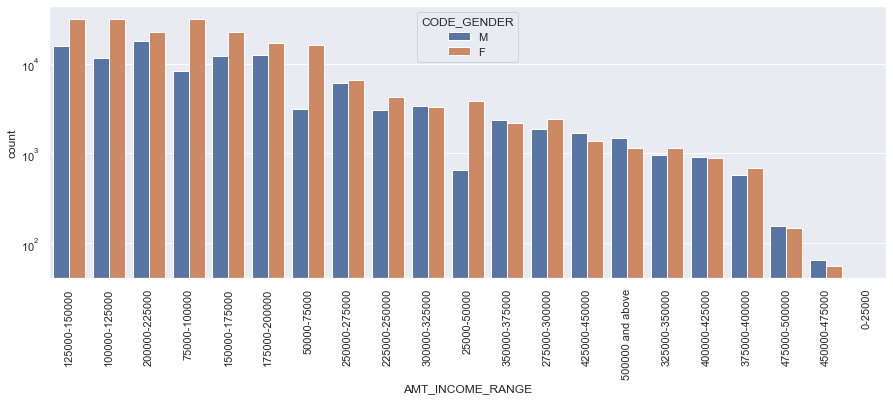

In [64]:
col_1 = 'AMT_INCOME_RANGE'
col_2 = 'CODE_GENDER'
bivariate_with_gender(df,col_1,col_2)

Points to be taken from the graph:-
1. Maximum amount of people who take loans lie in the mid income ranges like 75000-200000.
2. As the income goes up, the amount of people taking loans decreases.
3. Also people who earn very less dont take any loans.
4. For the lower income range, there are more females loan takers than males.
5. For the higher income range, their counts might almost be equal.

### Housing Type wise Applicants in various Credit ranges


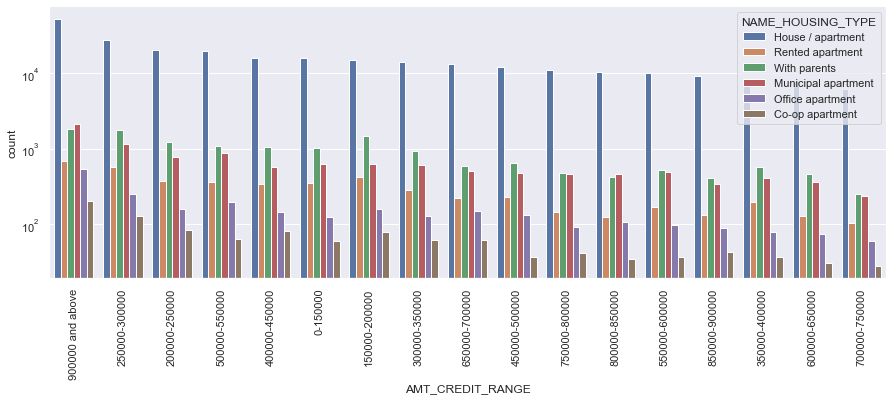

In [65]:
col_1 = 'AMT_CREDIT_RANGE'
col_2 = 'NAME_HOUSING_TYPE'
bivariate_with_gender(df,col_1,col_2)

Points to be taken from the graph:-
1. The trend is that the loans with a relatively lower value have a higher count than people with higher loan value.
2. There is one exception to the trend which is 90000 and above which has the highest count.
3. Generally people living with parents have a higher count of loans than people living with Municipal apartment.
4. The exceptions are people with high loan credit values. As the credit value increases, the count of people in Munipal apartment goes up relative to people living with friends.

## Univariate Segmented Analysis with Target

In [66]:
## Since the data is imbalanced, we will do segmented univariated analysis. Hence, dividing the data into 2 parts.

train_0 = df.loc[df['TARGET'] == 0] ## Users with no issues
train_1 = df.loc[df['TARGET'] == 1] ## Defaulters

In [67]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)
    sns.set(color_codes=True)
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    #train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    sns.countplot(x= column, data = train, ax = ax1)
    plt.xticks(rotation=90)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2,palette="Set3")
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of percentage')
    
    ax4 = plt.subplot(224)
    df['2'] = df['1']/df['0']
    df['2'].plot.bar(ax=ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for column values in term of percentage of defaulters by percentage of non defaulters for that value')
    


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()


### Analysis of NAME_CONTRACT_TYPE

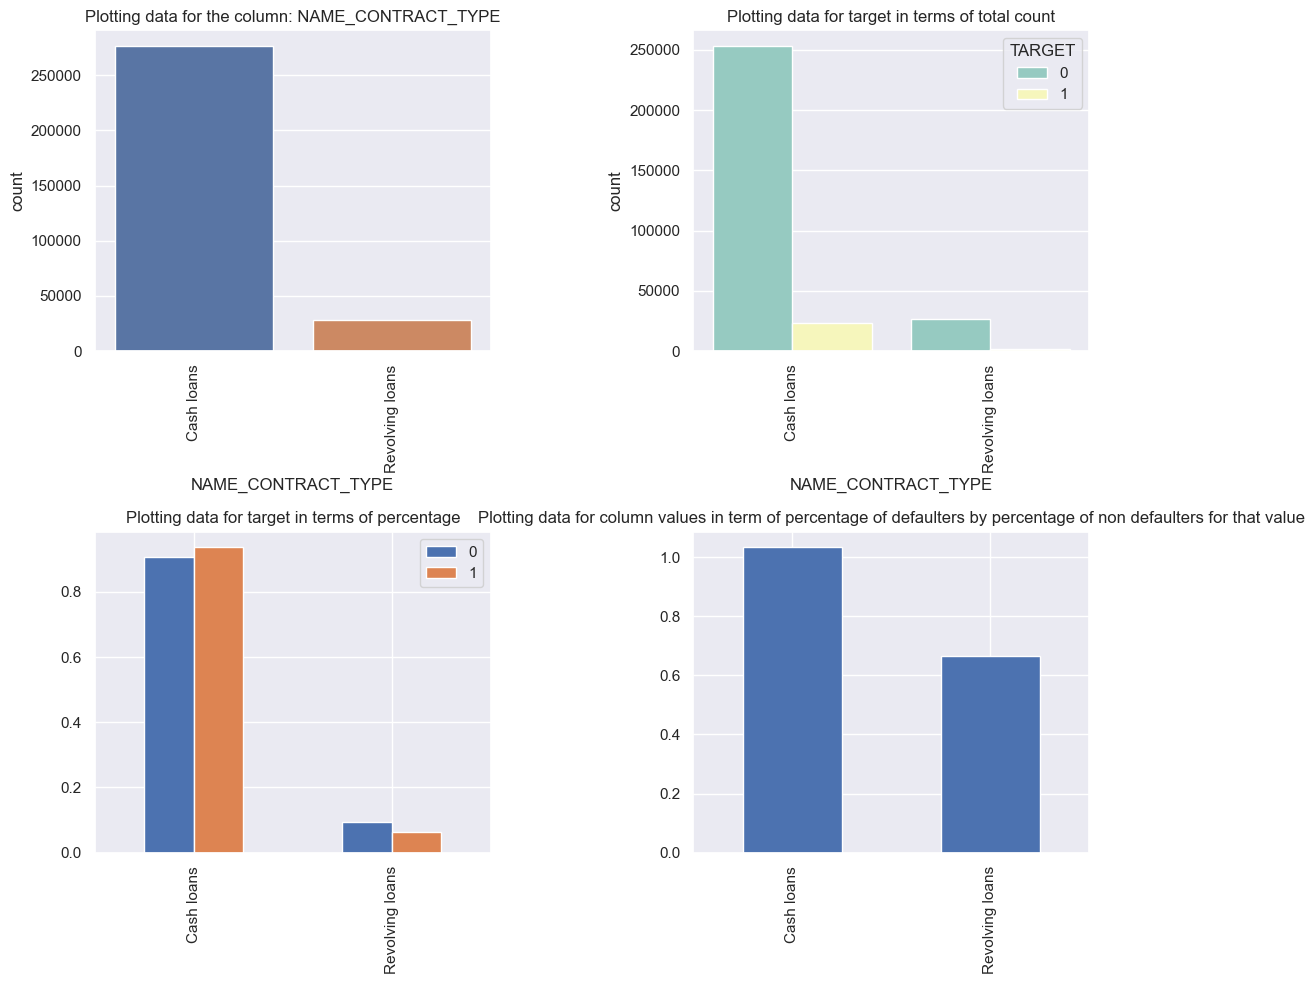

In [68]:
plotting(df, train_0, train_1,'NAME_CONTRACT_TYPE')

Points to be concluded from above graphs:-
1. The count of cash loans is much higher than revolving loans.
2. This count includes both defautlers and non defaulters
3. The percentage of defaulters is higher than non-defaulters in cash loans whereas it as vis-a-vis for revolving loans.

Hence, it is safer for the loan companies to allow loans with a revolving contract

### Analysis of column CODE_GENDER

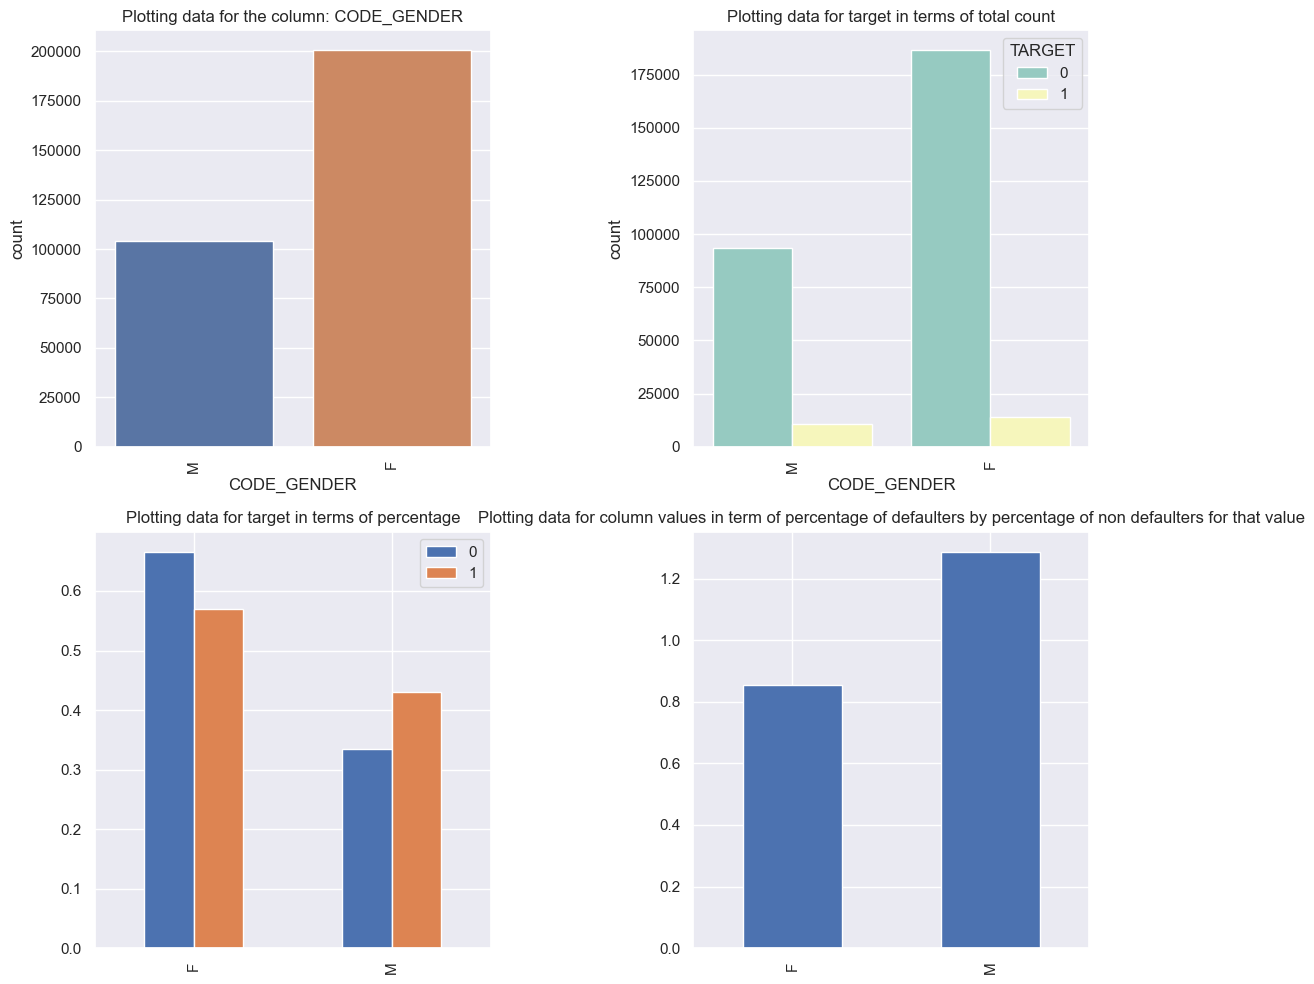

In [69]:
plotting(df, train_0, train_1,'CODE_GENDER')

Points to be concluded from the above graph:-
1. More females(66%) ask for loans when compared to males(34%).
2. This includes both Defaulters and non-defaulters.
3. Males have a higher ratio of % defaulters to % non-defaulters than females.

Hence, it is safer to give loans to females than males.

### Analysis of NAME_INCOME_TYPE

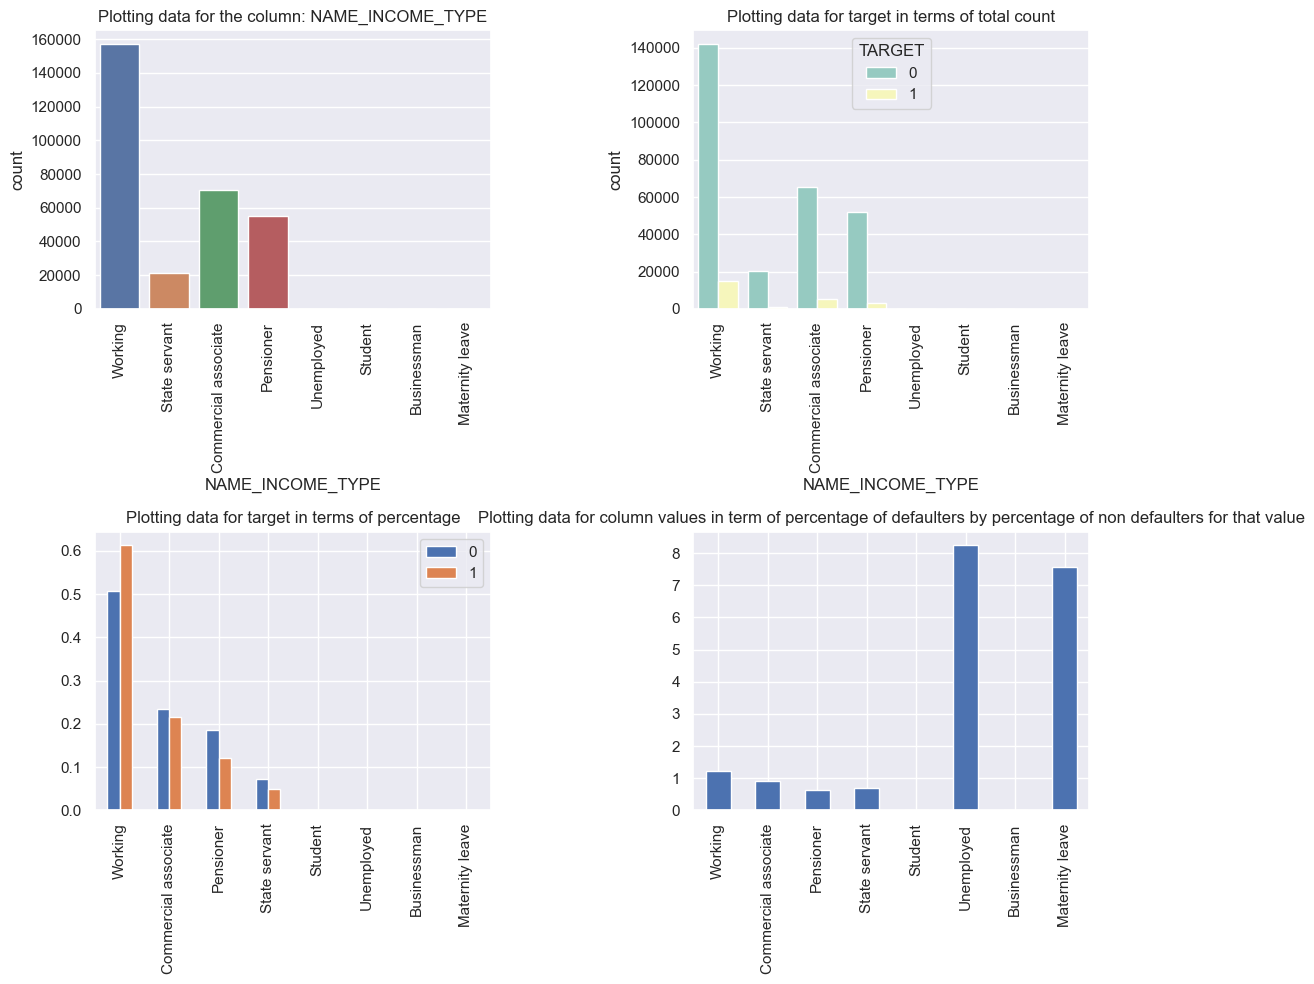

In [70]:
plotting(df, train_0, train_1,'NAME_INCOME_TYPE')

Points to be noted from the above graph:-
1. Working class people take the maximum loans among all income types. 
2. Student, Unemployed, Businessmen and people on maternity leave hardly take any loans.
3. Among the people who take loans the %-default by % non-default ratio of working people is the highest and higher than 1.

Hence, it's safer to give loans to Commercial associates, Pensioners and state servants than working people since they have a lower chance of defaulting. This maybe due to their higher and more secure income.

### Analysis of FLAG_OWN_REALTY

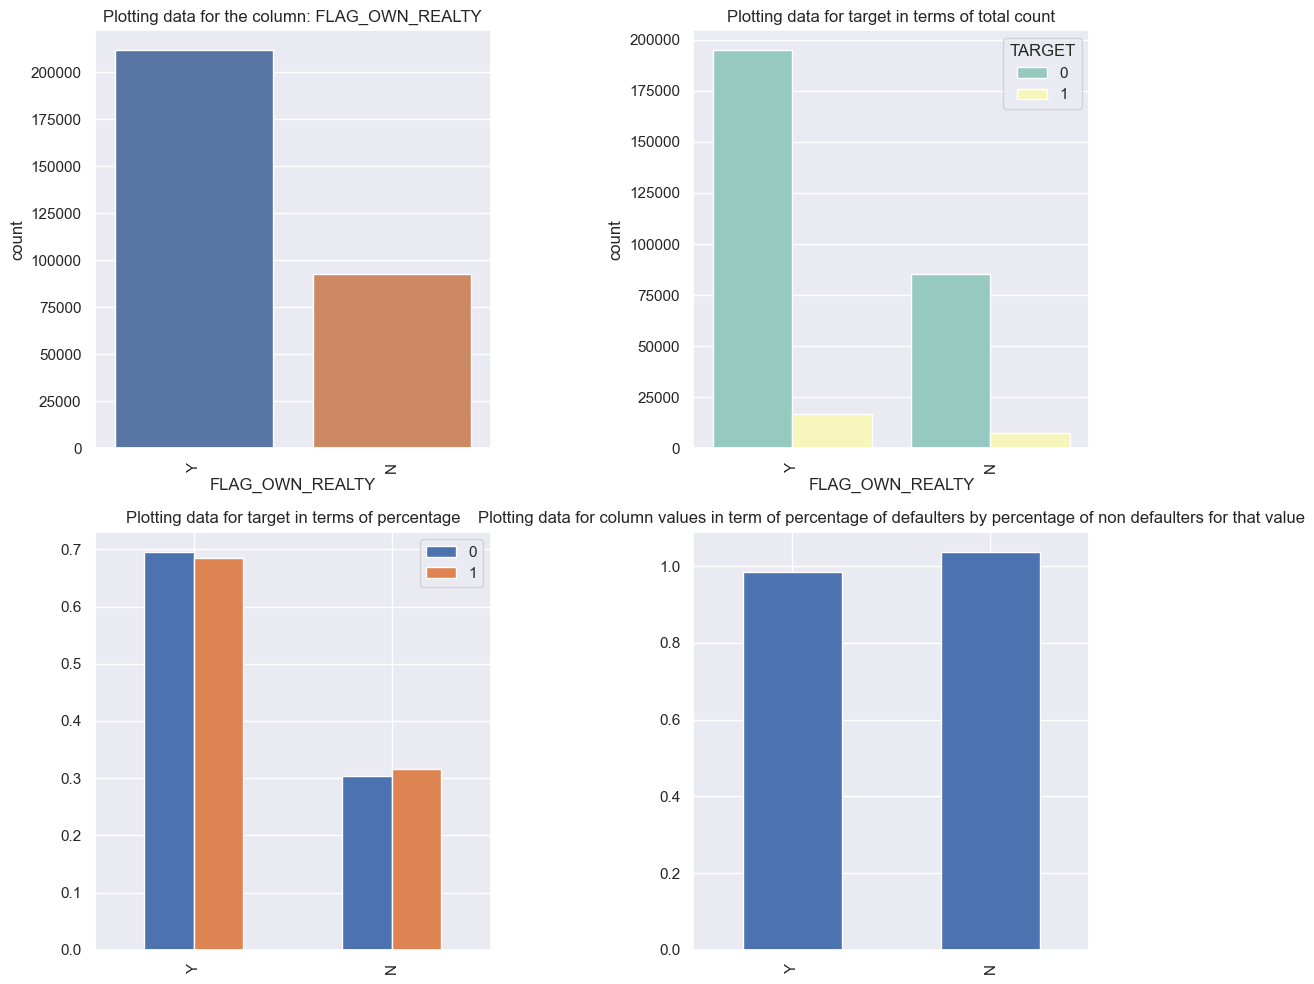

In [71]:
plotting(df, train_0, train_1,'FLAG_OWN_REALTY')

Points to be noted from the graph:-
1. People who either own a house or an apartment take more loans than the people who don't.
2. Defaulter % by Non-defaulter % ratio is higher for people who don't own any property than people who do.

Hence, it is safer to give loans to people who own property which makes sense as they have better financial security.

### Analysis of FLAG_OWN_CAR

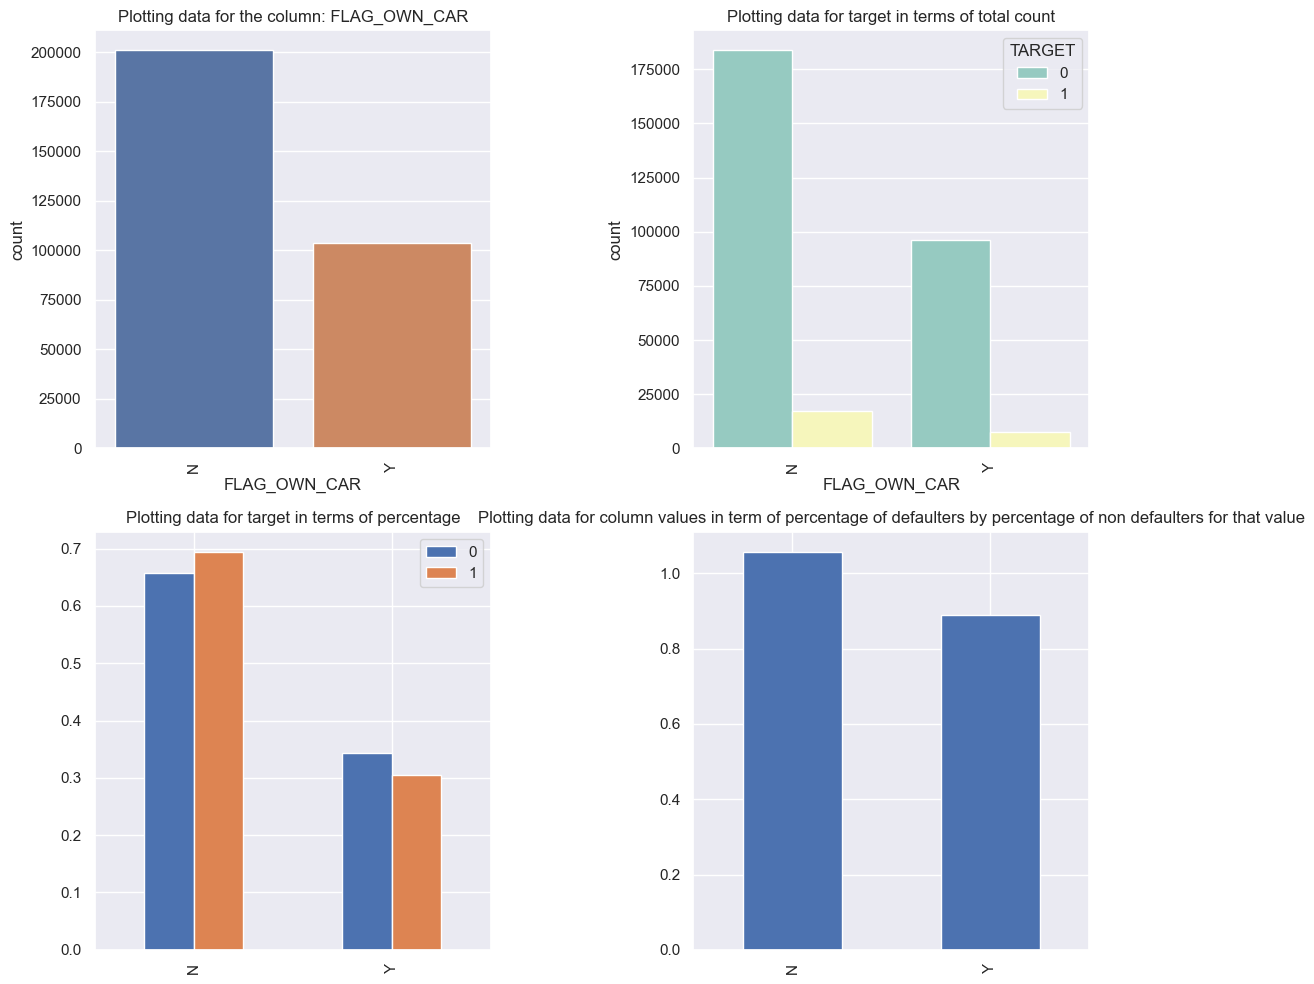

In [72]:
plotting(df, train_0, train_1,'FLAG_OWN_CAR')

Points to be noted from the graph:-
1. People who don't own a car take more loans than people who do own a car.
2. Defaulter % by Non-defaulter % ratio is higher for people who don't own any car than people who do.

Hence, it is safer to give loans to people who own a car which makes sense as they have better financial security.

### Analysis of OCCUPATION_TYPE

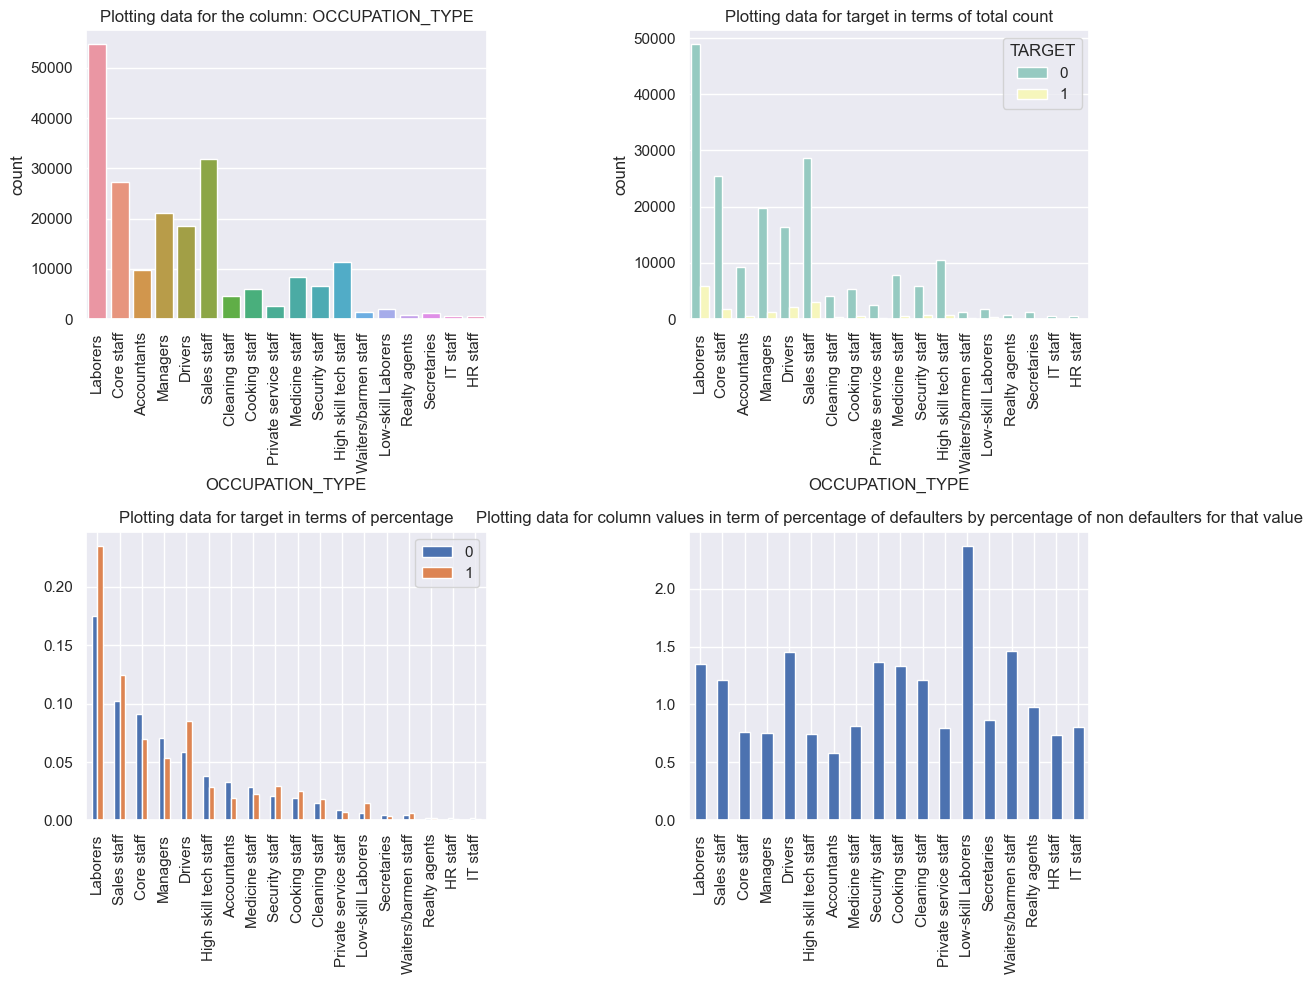

In [73]:
plotting(df, train_0, train_1,'OCCUPATION_TYPE')

Points to be noted from the graph:-
1. Labourers, Sales staff and core staff comprise of over 50% of loans.
2. Occupations like Managers, Accountants and high level staff members(Core, High Skill Tech, Medicine) have a lower % default by % non default ratio than occupations like Labourers, sales staff, drivers and other lower staff members.

Hence, it is safer to give loans to Managers, Accountants and high level staff members(Core, High Skill Tech, Medicine) than Labourers, sales staff, drivers and other lower staff members which makes sense which they have a higher income and better financial security.

### Analysis of NAME_EDUCATION_TYPE

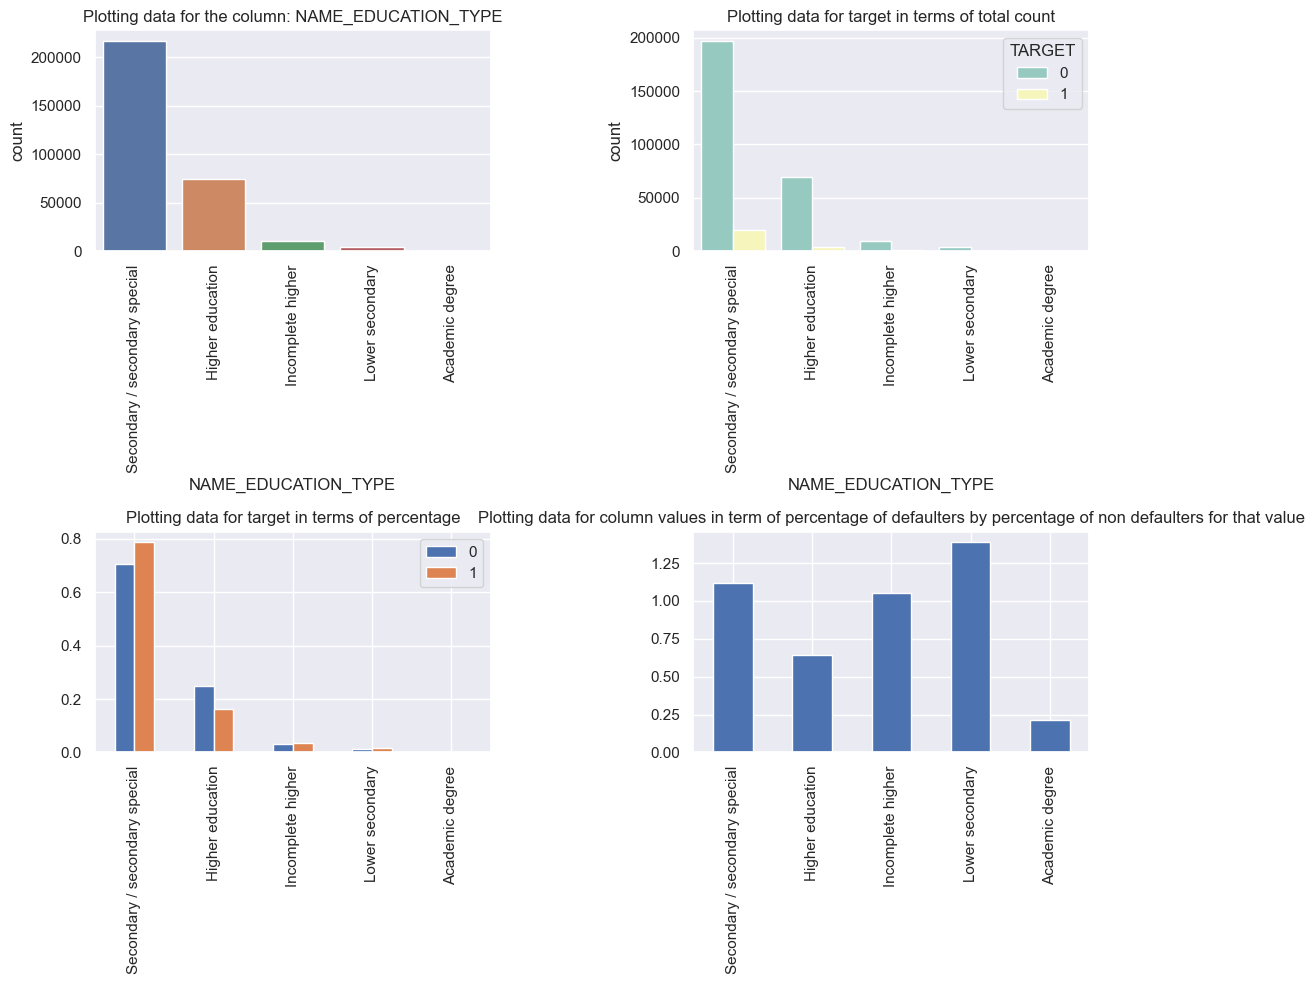

In [74]:
plotting(df, train_0, train_1,'NAME_EDUCATION_TYPE')

Points to be taken from the graph:-
1. People having education to the level of Secondary / secondary special take the highest amount of loans.
2. People having higher education is a lower value of % defaulter by % non-defaulter ratio than other levels of education.

Hence, it is safer to give loans to people having a higher level of education than those who have secondary, lower secondary or incomplete educations.

### Correlation among numerical analysis

In [75]:
corr0=train_0.iloc[0:,2:]
corr1=train_1.iloc[0:,2:]

ntarget0=corr0.corr(method='pearson')
ntarget1=corr1.corr(method='pearson')

In [76]:
#Correlation in case of Target 0
ntarget0=ntarget0.abs()
ntarget0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.028066,0.003194,0.021385,0.000504,0.024271,0.337664,0.243300,0.185985,0.028828,NaN,0.244221,0.054968,0.001363,0.030270,0.023409,0.878681,0.022896,0.021873,0.005084,0.012370,0.010557,0.017065,0.021646,0.072271,0.071052,0.015780,0.037003,0.004726,0.015552,0.004194,0.005708,0.004371,0.005629,0.012472,0.014582,0.002103,0.014255,0.002059,0.007862,0.003753,0.055611,0.003852,0.017533,0.158864,0.001048,0.054231,0.002916,0.002660,0.004827,0.000323,0.004199,0.005569,0.003750,0.010942,0.000829,0.003372,0.000671,0.001344,0.002983,0.000450,0.000993,0.000362,0.007762,0.004104,0.030630
AMT_INCOME_TOTAL,0.028066,1.000000,0.341478,0.417676,0.347984,0.165856,0.063012,0.142006,0.064601,0.023267,NaN,0.141497,0.031296,0.018584,0.003377,0.084450,0.034529,0.185363,0.199460,0.076124,0.068456,0.136722,0.127118,0.011137,0.018720,0.021706,0.139387,0.060385,0.012173,0.149927,0.011360,0.121266,0.012136,0.125430,0.108132,0.027852,0.027526,0.027718,0.027535,0.043015,0.002872,0.037529,0.001183,0.005623,0.100037,0.012683,0.160640,0.039774,0.000939,0.005453,0.005730,0.049529,0.045168,0.022449,0.015331,0.005362,0.008201,0.005876,0.001143,0.000718,0.002707,0.008278,0.008810,0.058944,0.017940,0.044160
AMT_CREDIT,0.003194,0.341478,1.000000,0.770379,0.987260,0.100760,0.048136,0.072218,0.012724,0.001024,NaN,0.070953,0.017111,0.023543,0.026916,0.017184,0.064625,0.103412,0.112408,0.053504,0.024655,0.053693,0.054217,0.024934,0.015627,0.002606,0.129431,0.033724,0.004655,0.088884,0.003845,0.074499,0.004310,0.076237,0.065072,0.001053,0.019770,0.001027,0.022154,0.071116,0.005515,0.098424,0.000558,0.008660,0.049822,0.000965,0.084330,0.021210,0.002770,0.027662,0.003975,0.052867,0.047505,0.031185,0.061026,0.011166,0.034873,0.021155,0.031097,0.015397,0.001929,0.004788,0.000668,0.054996,0.021971,0.026800
AMT_ANNUITY,0.021385,0.417676,0.770379,1.000000,0.775838,0.120986,0.012751,0.106935,0.039285,0.014719,NaN,0.106158,0.022262,0.022038,0.012425,0.071665,0.076114,0.132170,0.145310,0.053554,0.041911,0.080737,0.075637,0.005535,0.001758,0.010852,0.126844,0.024707,0.011022,0.112822,0.010663,0.095247,0.010735,0.097405,0.081854,0.013127,0.022530,0.012931,0.023351,0.062929,0.001258,0.102039,0.001091,0.002580,0.074725,0.001857,0.131677,0.033383,0.002909,0.004688,0.000862,0.025646,0.037198,0.014809,0.007676,0.002919,0.008378,0.004894,0.012185,0.016261,0.003648,0.002322,0.012322,0.036114,0.011692,0.005099
AMT_GOODS_PRICE,0.000504,0.347984,0.987260,0.775838,1.000000,0.103856,0.045635,0.070603,0.015163,0.003348,NaN,0.069313,0.004334,0.020654,0.041910,0.017331,0.062887,0.104265,0.112600,0.062505,0.026800,0.054869,0.054303,0.024790,0.016722,0.001341,0.135907,0.036246,0.005470,0.093813,0.004645,0.078290,0.005182,0.080059,0.069414,0.

In [77]:
#Correlation in case of Target 1
ntarget1=ntarget1.abs()
ntarget1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004792,0.001534,0.031118,0.008114,0.031885,0.258889,0.192111,0.148700,0.033480,NaN,0.192648,0.051303,0.003609,0.024262,0.014003,0.885556,0.041342,0.043820,0.023612,0.024085,0.020449,0.011732,0.000488,0.045904,0.052923,0.011959,0.024110,0.003150,0.021647,0.002897,0.006089,0.002995,0.006119,0.017890,0.025948,0.001920,0.025323,0.004660,0.012128,0.007801,0.059892,NaN,0.022947,0.129277,0.005516,0.029715,0.004560,NaN,0.007579,NaN,0.001605,0.000103,0.004808,0.001452,0.005516,0.002822,0.000262,0.002405,0.001135,0.000951,0.011296,0.008994,0.009158,0.013521,0.021137
AMT_INCOME_TOTAL,0.004792,1.000000,0.037845,0.046189,0.037339,0.009201,0.003076,0.014902,0.000054,0.004195,NaN,0.014895,0.012120,0.000870,0.004506,0.009858,0.006670,0.021473,0.022783,0.013733,0.007547,0.014471,0.013378,0.002218,0.003109,0.001439,0.007201,0.018188,0.001171,0.013570,0.001083,0.006703,0.001154,0.007018,0.009483,0.004721,0.005200,0.004630,0.004842,0.002338,0.000166,0.001214,NaN,0.000739,0.011712,0.000316,0.016090,0.004798,NaN,0.000183,NaN,0.005932,0.004100,0.001867,0.001679,0.000370,0.002266,0.000371,0.000455,0.000651,0.001068,0.000122,0.000933,0.005682,0.000960,0.006756
AMT_CREDIT,0.001534,0.037845,1.000000,0.751400,0.983065,0.068751,0.136683,0.000230,0.026396,0.052195,NaN,0.001868,0.059499,0.031978,0.008073,0.010228,0.051666,0.058003,0.070251,0.030853,0.019624,0.032285,0.032555,0.032922,0.038783,0.017670,0.121507,0.052594,0.004853,0.072998,0.000687,0.053537,0.004174,0.054959,0.056438,0.019937,0.025922,0.020279,0.030704,0.111768,0.034331,0.058396,NaN,0.008898,0.004834,0.009551,0.055480,0.026955,NaN,0.037044,NaN,0.013252,0.056098,0.026458,0.047450,0.000714,0.011433,0.013902,0.016968,0.022096,0.004116,0.004226,0.010890,0.055797,0.007299,0.008989
AMT_ANNUITY,0.031118,0.046189,0.751400,1.000000,0.752206,0.071496,0.014724,0.081939,0.033872,0.016408,NaN,0.081184,0.049719,0.035957,0.014522,0.078264,0.075943,0.073362,0.088908,0.030379,0.034765,0.066079,0.063767,0.005805,0.001407,0.009285,0.117495,0.032797,0.000425,0.081367,0.002816,0.064276,0.000319,0.065295,0.059250,0.004946,0.022534,0.005931,0.027581,0.080135,0.018086,0.101036,NaN,0.010422,0.063606,0.012279,0.117378,0.030566,NaN,0.000950,NaN,0.000925,0.020520,0.011704,0.002612,0.006095,0.034879,0.001092,0.001561,0.029693,0.012055,0.000194,0.029001,0.048613,0.007779,0.007516
AMT_GOODS_PRICE,0.008114,0.037339,0.983065,0.752206,1.000000,0.075933,0.137117,0.004735,0.026389,0.056019,NaN,0.006427,0.034147,0.028800,0.026731,0.013954,0.047699,0.065178,0.076048,0.043435,0.022575,0.035632,0.034801,0.033814,0.040112,0.018090,0.131572,0.053229,0.004078,0.078899,0.000073,0.058183,0.003431,0.059673,0.061965,0.020660,0.021869,0.021126,0.026169,0.118894,0.040986,0.036293

In [78]:
#Defining heatmap function to visualize the above correlation
def heatcorr(data,title):
    plt.figure(figsize=(25, 12))
    #plt.rcParams['axes.titlesize'] = 25
    #plt.rcParams['axes.titlepad'] = 70
    
    sns.heatmap(data, cmap="YlGnBu",annot=False)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()


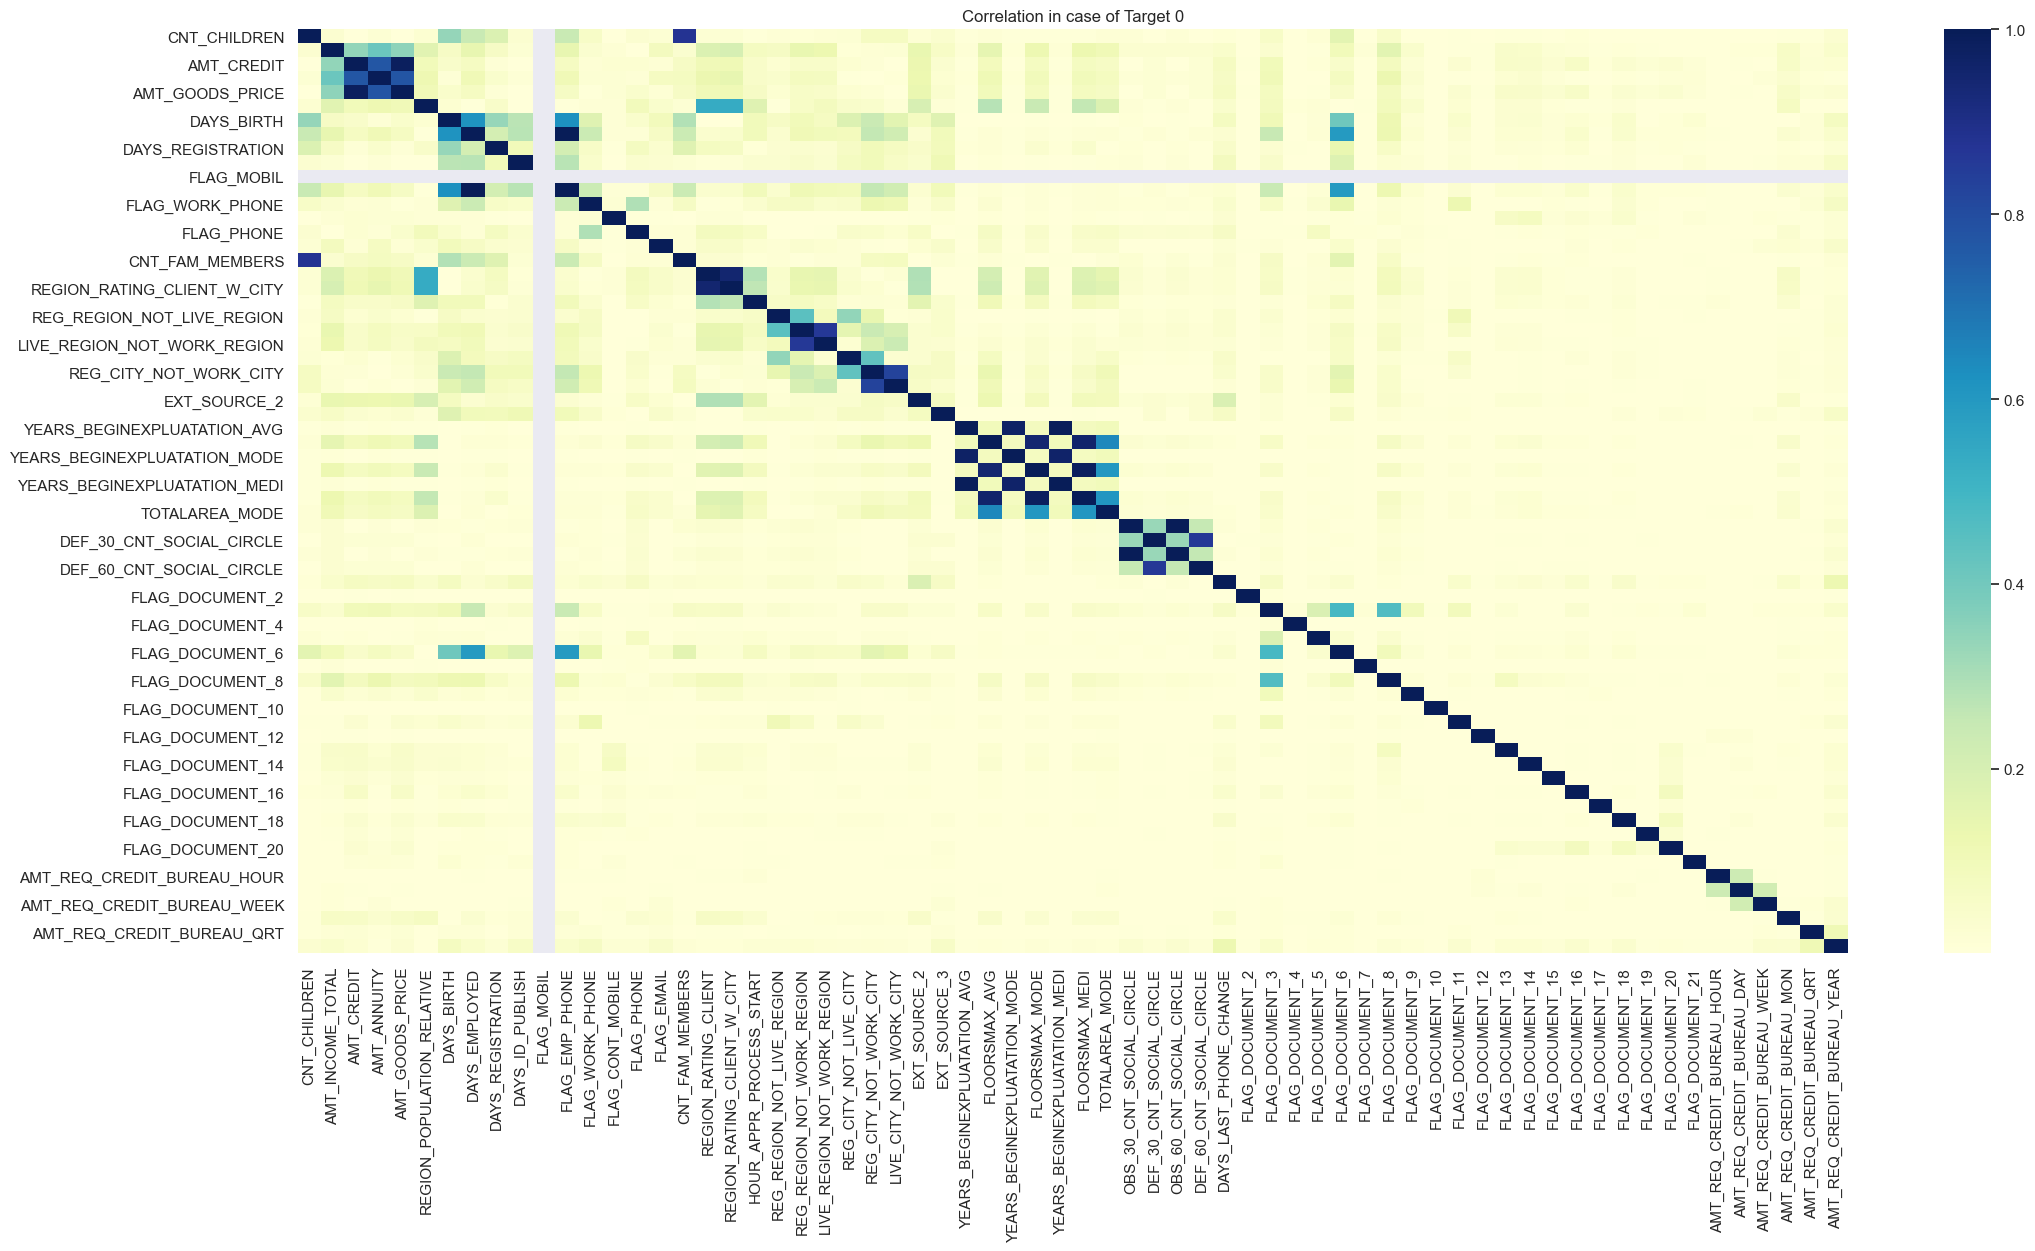

In [79]:
heatcorr(data=ntarget0,title='Correlation in case of Target 0')

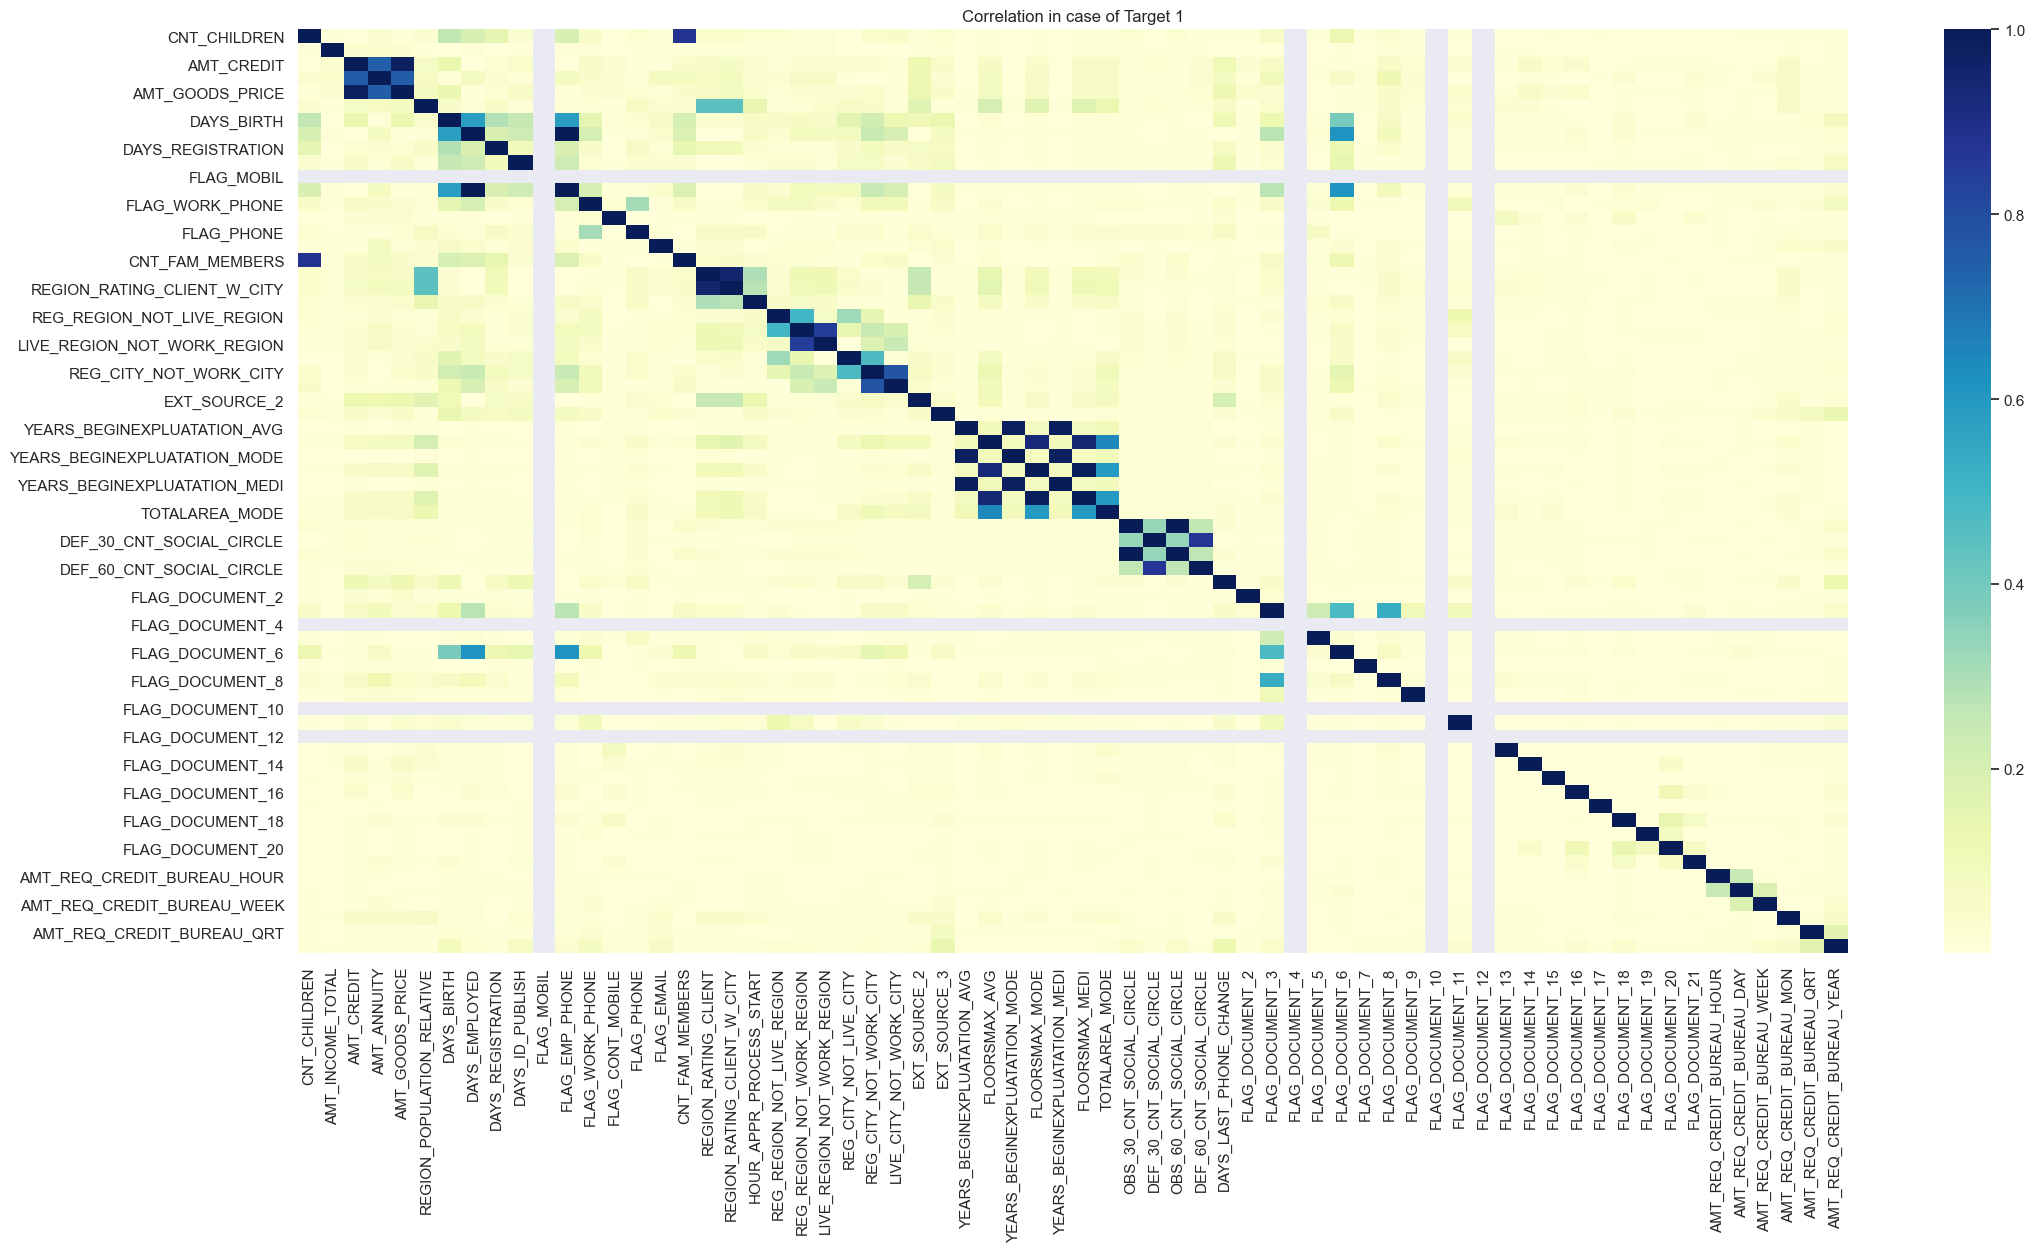

In [80]:
heatcorr(data=ntarget1,title='Correlation in case of Target 1')

##### As evident from the above heatmap that there are certain variables that dont have any significant correlation. We will need to reduce the unwanted variables 

### Removing many unwanted variables from ntarget0 and ntarget1

In [81]:
ntarget0.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1, inplace=True)


In [82]:
ntarget0.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=0, inplace=True)

In [83]:
ntarget1.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1, inplace=True)



In [84]:
ntarget1.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis=0, inplace=True)



In [85]:
ntarget0.unstack().sort_values(kind='quicksort').dropna()

DEF_60_CNT_SOCIAL_CIRCLE     DAYS_LAST_PHONE_CHANGE         0.000029
DAYS_LAST_PHONE_CHANGE       DEF_60_CNT_SOCIAL_CIRCLE       0.000029
OBS_60_CNT_SOCIAL_CIRCLE     YEARS_BEGINEXPLUATATION_AVG    0.000169
YEARS_BEGINEXPLUATATION_AVG  OBS_60_CNT_SOCIAL_CIRCLE       0.000169
REG_REGION_NOT_LIVE_REGION   TOTALAREA_MODE                 0.000170
                                                              ...   
REG_CITY_NOT_WORK_CITY       REG_CITY_NOT_WORK_CITY         1.000000
REG_CITY_NOT_LIVE_CITY       REG_CITY_NOT_LIVE_CITY         1.000000
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    1.000000
HOUR_APPR_PROCESS_START      HOUR_APPR_PROCESS_START        1.000000
DAYS_LAST_PHONE_CHANGE       DAYS_LAST_PHONE_CHANGE         1.000000
Length: 1521, dtype: float64

In [86]:
ntarget1.unstack().sort_values(kind='quicksort').dropna()

AMT_INCOME_TOTAL              DAYS_REGISTRATION               0.000054
DAYS_REGISTRATION             AMT_INCOME_TOTAL                0.000054
YEARS_BEGINEXPLUATATION_MODE  AMT_GOODS_PRICE                 0.000073
AMT_GOODS_PRICE               YEARS_BEGINEXPLUATATION_MODE    0.000073
YEARS_BEGINEXPLUATATION_MEDI  DAYS_ID_PUBLISH                 0.000073
                                                                ...   
REG_CITY_NOT_WORK_CITY        REG_CITY_NOT_WORK_CITY          1.000000
REG_CITY_NOT_LIVE_CITY        REG_CITY_NOT_LIVE_CITY          1.000000
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     1.000000
HOUR_APPR_PROCESS_START       HOUR_APPR_PROCESS_START         1.000000
DAYS_LAST_PHONE_CHANGE        DAYS_LAST_PHONE_CHANGE          1.000000
Length: 1521, dtype: float64

In [87]:
correlation_0 = ntarget0.unstack().sort_values(kind='quicksort').dropna()

In [88]:
#Finding the top 10 correlation in target 0

correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0.sort_values(ascending=False).head(10)

FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999757
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999757
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998513
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998513
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993526
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993526
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988212
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988212
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987260
AMT_GOODS_PRICE               AMT_CREDIT                      0.987260
dtype: float64

In [89]:
correlation_1 = ntarget1.unstack().sort_values(kind='quicksort').dropna()

In [90]:
#Finding the top 10 correlation in target 1

correlation_1 = correlation_1[correlation_1 != 1.0]
correlation_1.sort_values(ascending=False).head(10)

DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999700
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999700
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998286
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998286
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996056
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996056
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989312
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989312
AMT_GOODS_PRICE               AMT_CREDIT                      0.983065
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983065
dtype: float64

#### Redrawing the heatmap with lesser variables and clearer view

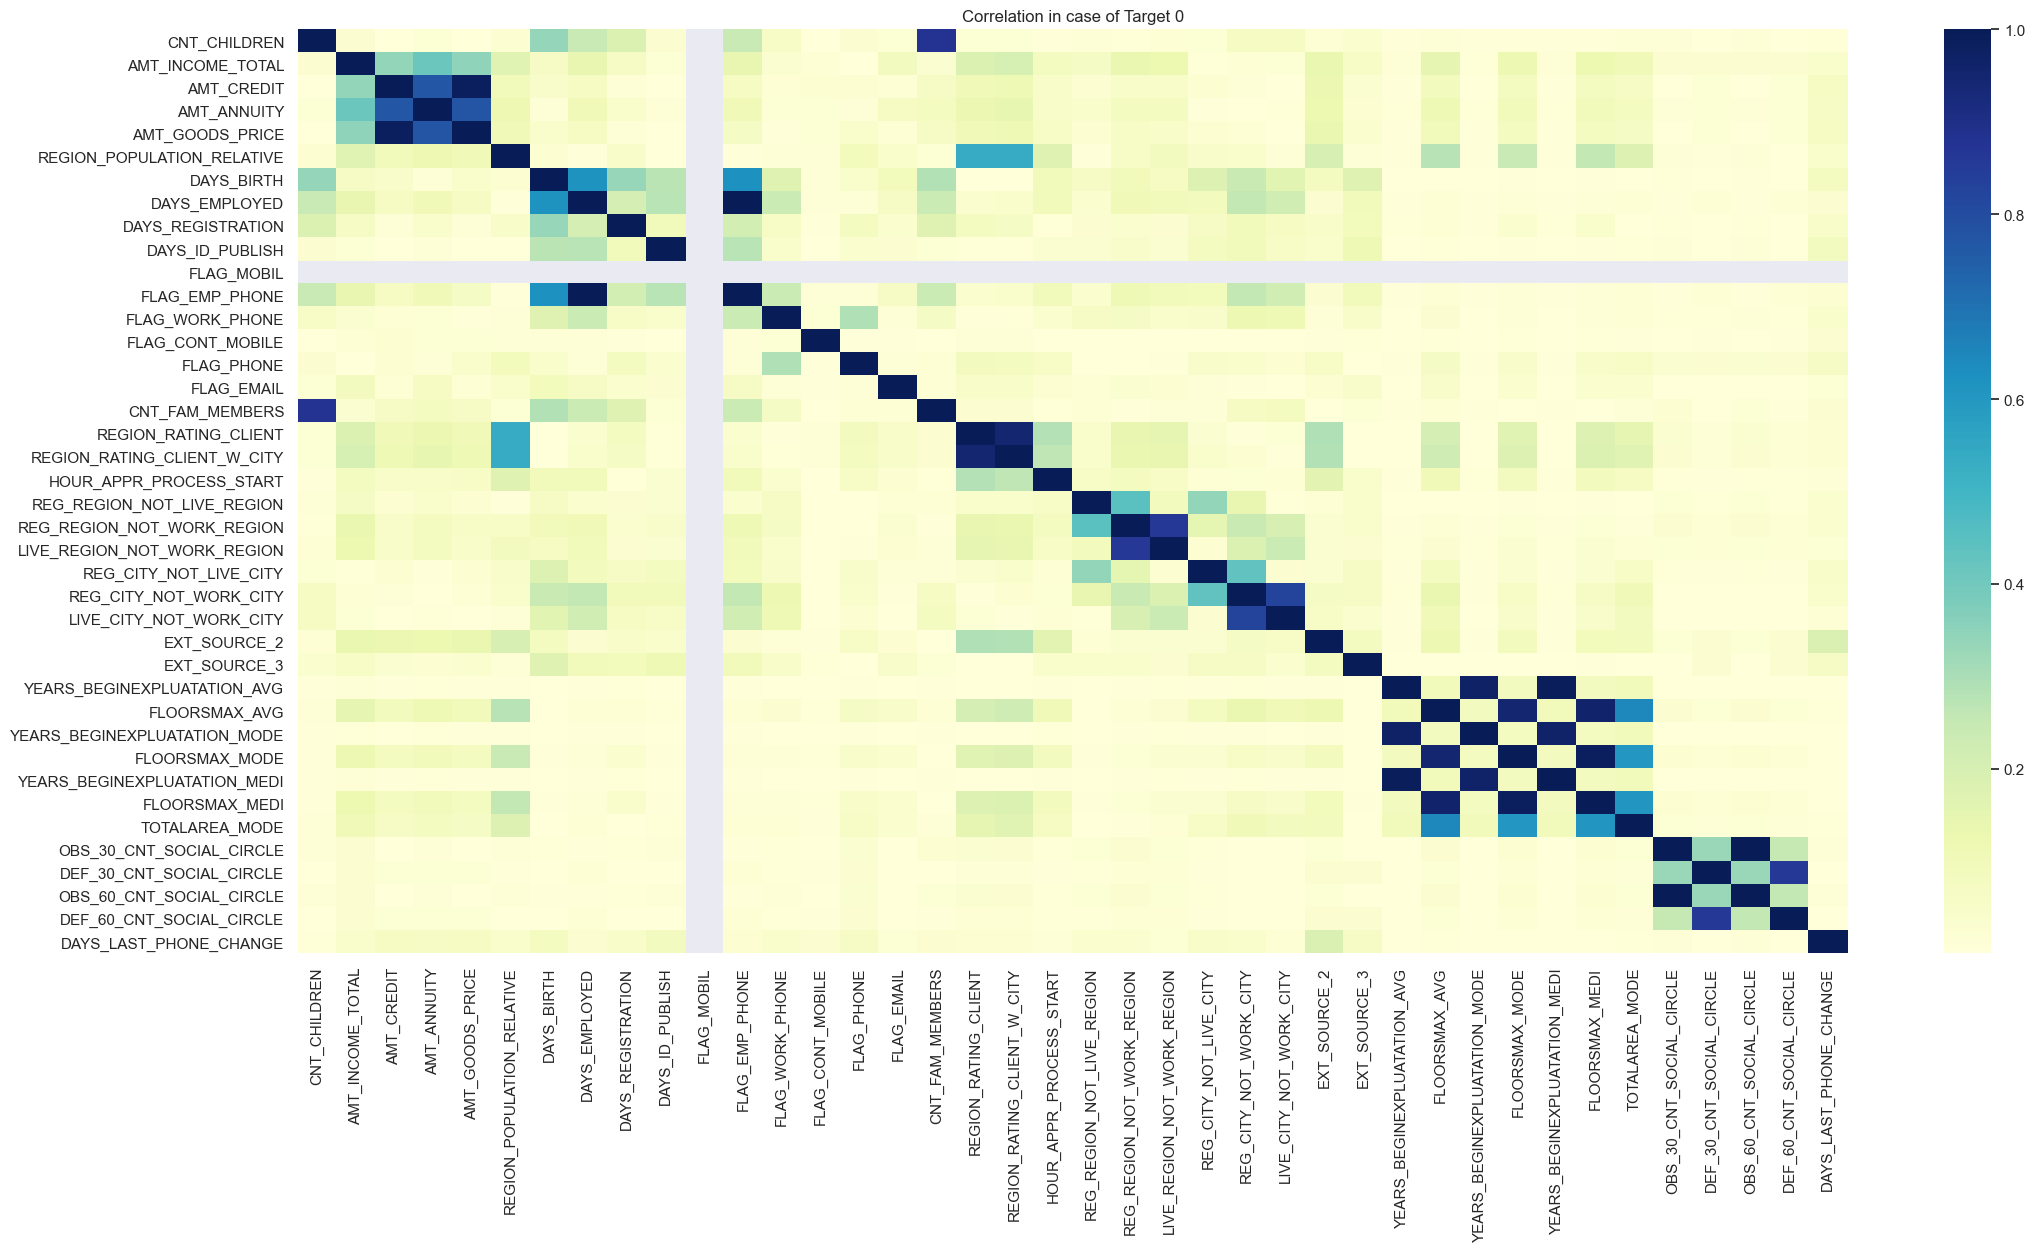

In [91]:
heatcorr(data=ntarget0,title='Correlation in case of Target 0')

From above correlation heatmap here, we observe that

1. Credit amount of loan and annuity is higher for clients with higher income.
2. Credit amount of loan is inversely proportion to children count. For a client with more children credit amount is lesser.
3. Work phones are mostly found with clients of higher age.
4. Region population relative is inversely proportional to clients age which means that mostly young people live densely populated regions.
5. Family member counts is directly proportional to children count.
6. Days employed is inversely proportional to clients age. There is higher probablity of recently changing the job in younger clients. 

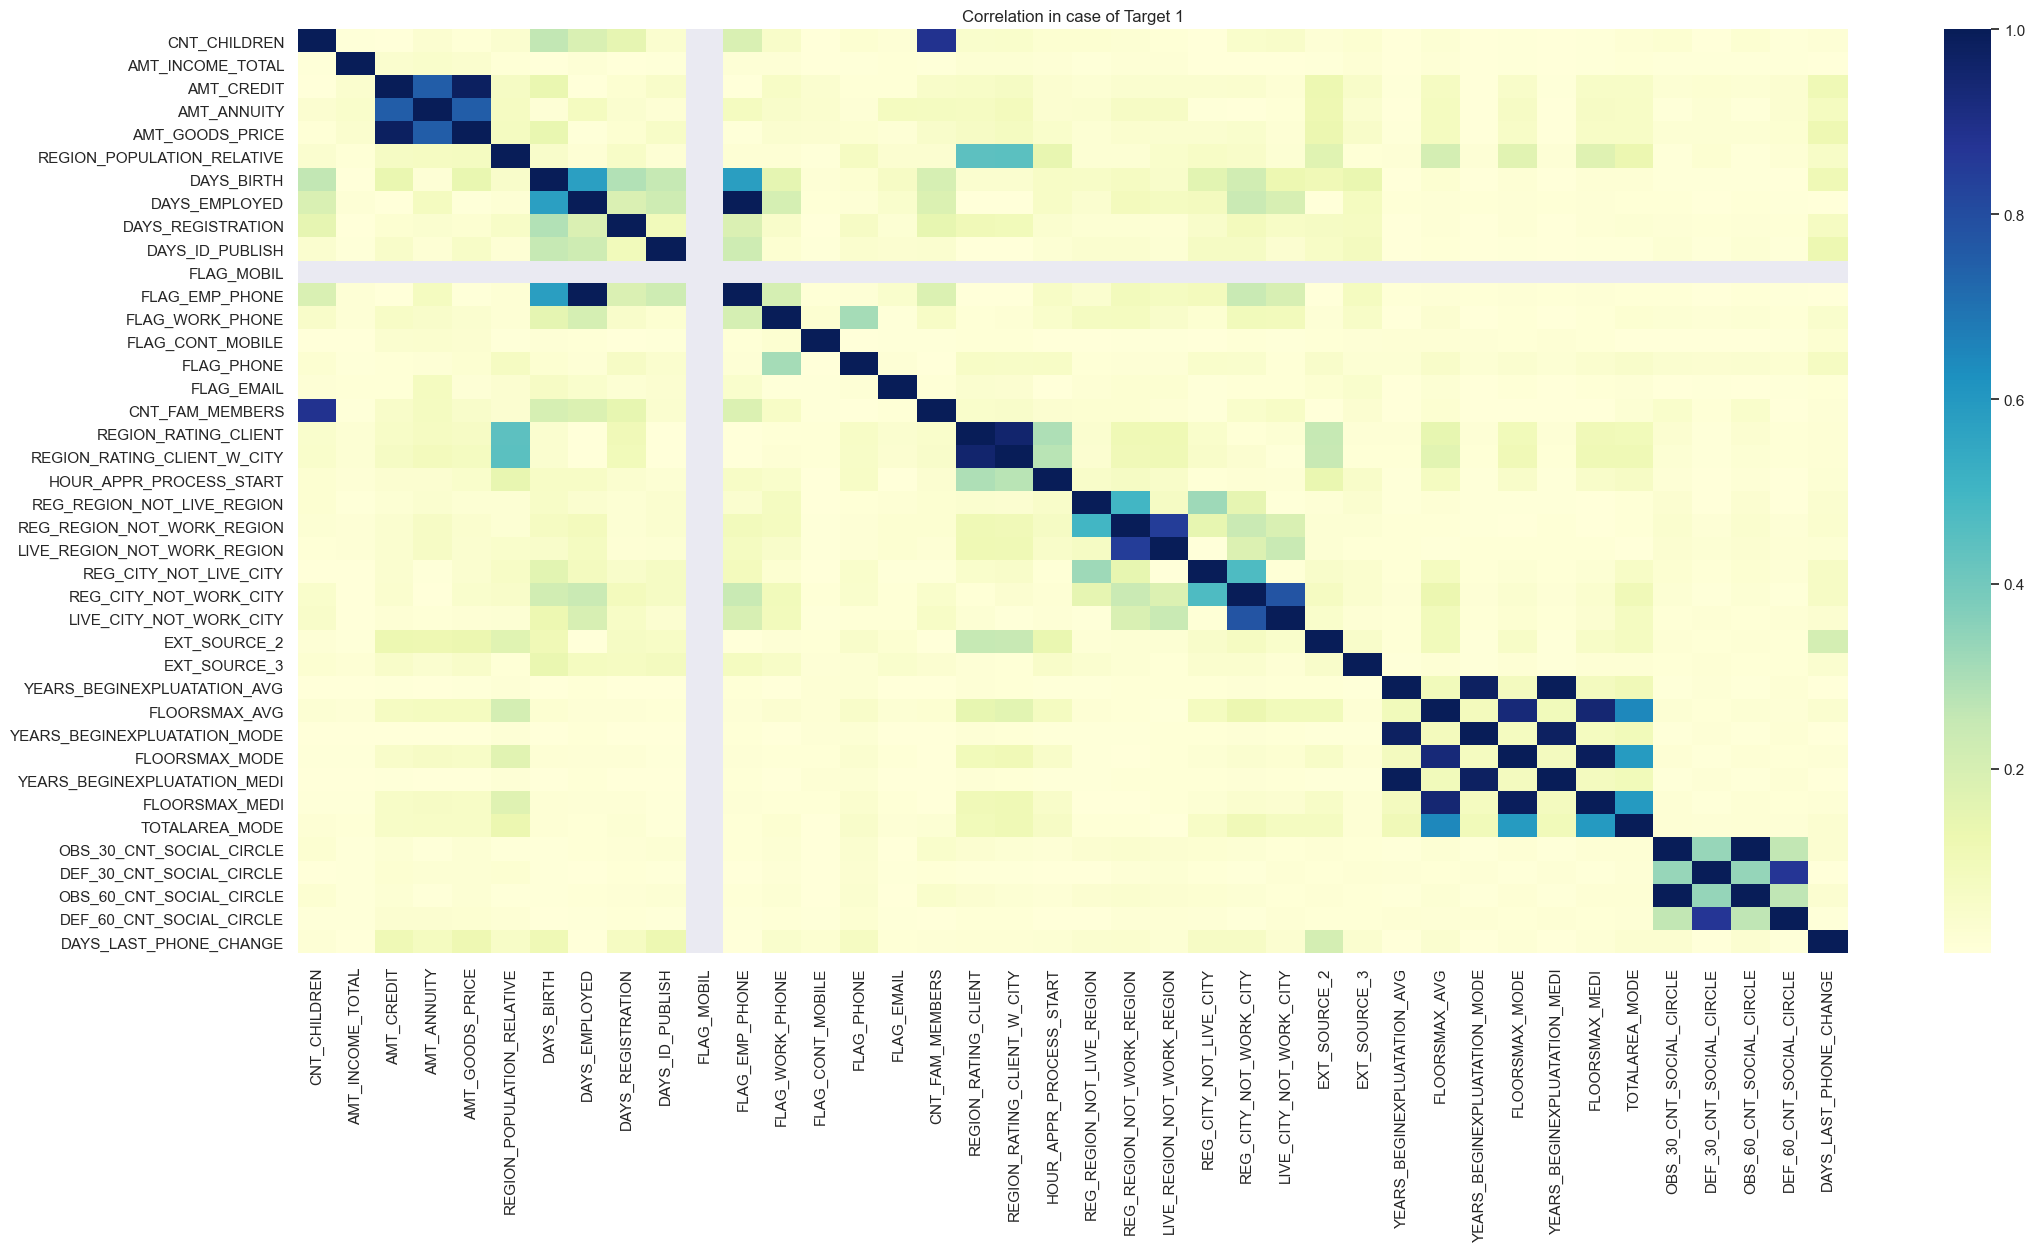

In [92]:
heatcorr(data=ntarget1,title='Correlation in case of Target 1')

From above correlation heatmap here, we observe that

1. Total annual income is inversely proportional to region population relative. Highly populated region have low income clients.
2. Annuity is inversely proportional to clients age. Young clients pay higher annuity. 
3. Credit amount of the loan is inversely proportional to the number of children the client has. 
4. Credit amount of the loan is inversely proportional to the client's age. 
5. DAYS_EMPLOYED is inversely proportional to region population relative. For a region with high population density, there is higher propbablity of clients with a record of recently changing their job.

### Univariate Analysis of Numerical Variables

In [93]:
# Box plotting for univariate variables analysis in logarithmic scale for Target 0.

def univar_num(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.figure(figsize=(10, 2))
    plt.title(title)
    plt.xscale('log')
    sns.boxplot(data =train_0, y=col,orient='h')
    plt.show()
    

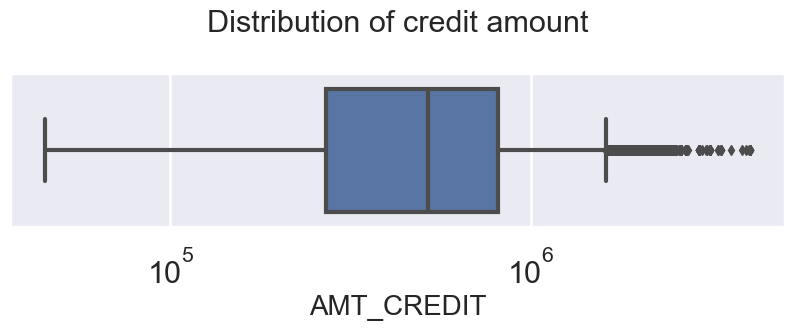

In [94]:
# Disrtibution of credit amount for Target 0 

univar_num(data=train_0,col='AMT_CREDIT',title='Distribution of credit amount')

1. The credit amount of loan is mostly between 100000 to 1000000.
2. There are some outliers beyond 1000000 but not spread for too larger amounts. 
3. The first and second quartiles have most of the loans. 

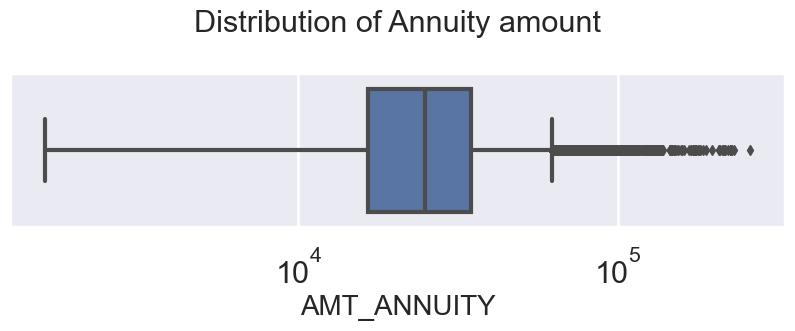

In [95]:
# Distribution of anuuity amount for Target 0 

univar_num(data=train_0,col='AMT_ANNUITY',title='Distribution of Annuity amount')

1. Most of the annuities value fall in the first quartiles and followed by second quartile. 
2. Outliers are there and more sporadic than in case of credit amount.

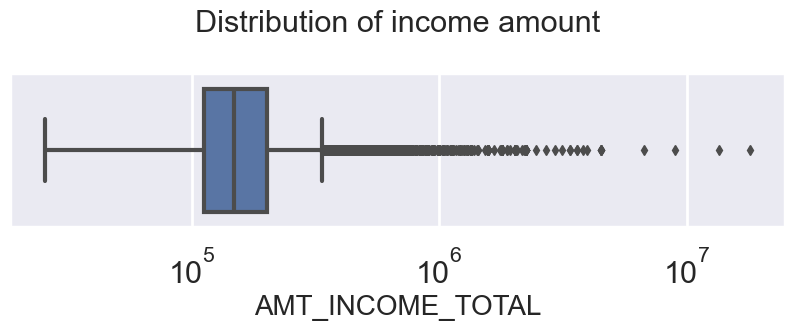

In [96]:
# Distribution of income amount for Target 0 

univar_num(data=train_0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

1. Most of the clients fall in first quartile of the income range
2. The income range is spread over a vast range with many outliers.

In [97]:
# Box plotting for univariate variables analysis in logarithmic scale for Target 1.

def univar_num1(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.figure(figsize=(10, 2))
    plt.title(title)
    plt.xscale('log')
    sns.boxplot(data =train_1, y=col,orient='h')
    plt.show()
    

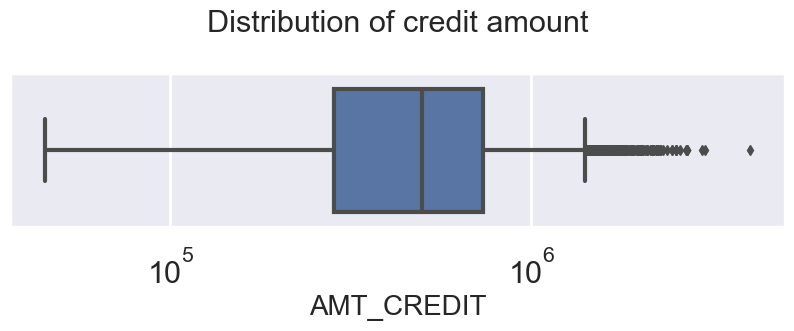

In [98]:
# Disrtibution of credit amount for Target 1 

univar_num1(data=train_1,col='AMT_CREDIT',title='Distribution of credit amount')

1. The credit amount of loan is mostly between 100000 to 1000000.
2. There are some outliers beyond 1000000 but not spread for too larger amounts. 
3. The second quartile have most of the loans followed by first quartile. 

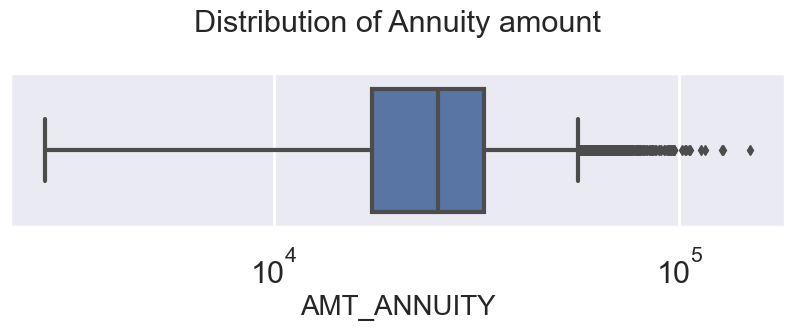

In [99]:
# Distribution of anuuity amount for Target 1 

univar_num1(data=train_1,col='AMT_ANNUITY',title='Distribution of Annuity amount')

1. Most of the annuities value fall in the first quartiles and followed by second quartile. 
2. Outliers are there and more sporadic than in case of credit amount.

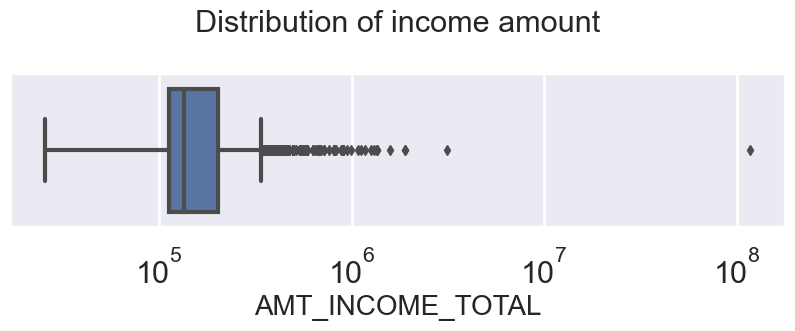

In [100]:
# Distribution of income amount for Target 1 

univar_num1(data=train_1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

1. Most of the clients fall in first quartile of the income range
2. The income range is spread over a vast range with many outliers.

### Outlier Analysis

In [101]:
def find_outliers(df,column):
    fig = plt.figure(figsize=(15,5))

    ax1 = plt.subplot(121)
    sns.scatterplot(df.index, df[column],ax=ax1,s=10)

    ax2 = plt.subplot(122)
    sns.boxplot(df[column],ax=ax2)

    plt.title('Plotting data for the column: '+ column)

    fig.tight_layout()
    plt.show()

### Finding outliers for CNT_CHILDREN

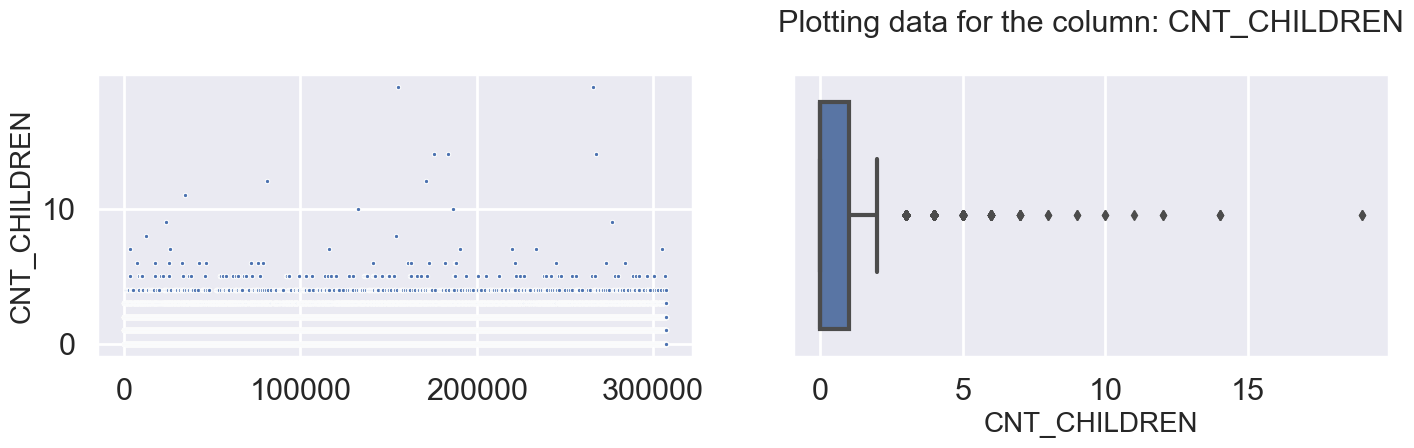

In [102]:
col = 'CNT_CHILDREN'
find_outliers(df,col)

Points to be taken from the graph:-
1. There are some data points where the value is above 10 and even above 15.
2. Logically this means the number of children is above 10 which is an outlier because nowadays the chance of that happening is very less.
3. We need to check other columns also before making such a decision since having more children might lead to a higher distribution of income towards them hence leading to default.

### Finding outliers for OBS_30_CNT_SOCIAL_CIRCLE

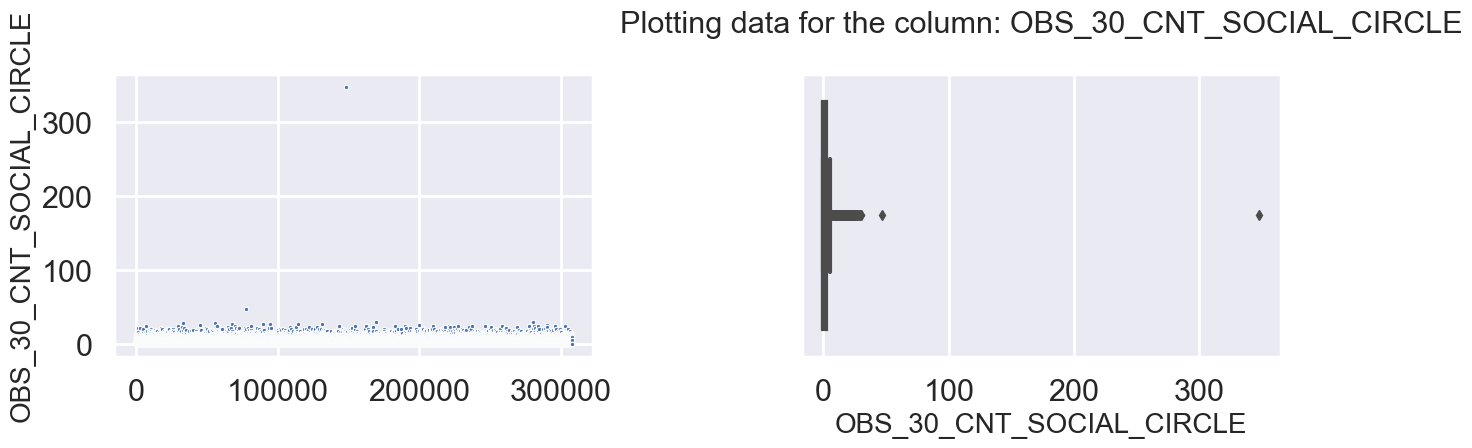

In [103]:
col = 'OBS_30_CNT_SOCIAL_CIRCLE'
find_outliers(df,col)

#### Points to be taken from the graph:-
1. There is one huge outlier from the graph as we can see.
2. According to the logic this means that there are around 350 observations of a client's social surrounding with an observable 30 days past due default.
3. We should check other columns also for this row to see if it makes any sense because this value seems too large and could also be an error.

## Inputting data from previous loan application

In [104]:
df_prev = pd.read_csv('previous_application.csv')

df_prev = df_prev.drop_duplicates('SK_ID_CURR')

df_merged = pd.merge(df,df_prev,on='SK_ID_CURR',how='inner')

In [105]:
df_merged.head() ## Seeing top 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.972200,0.0833,0.972200,0.083300,0.972200,0.083300,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,0.985100,0.2917,0.985100,0.291700,0.985100,0.291700,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-275000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.977735,0.1667,0.977065,0.222315,0.977752,0.225897,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0

## Cleaning NAME_CASH_LOAN_PURPOSE

In [106]:
df_merged_1 = df_merged[~df_merged['NAME_CASH_LOAN_PURPOSE'].isin(['XNA','XAP'])]

### Bivariate analysis of Credit amount of previous loan application with the income type

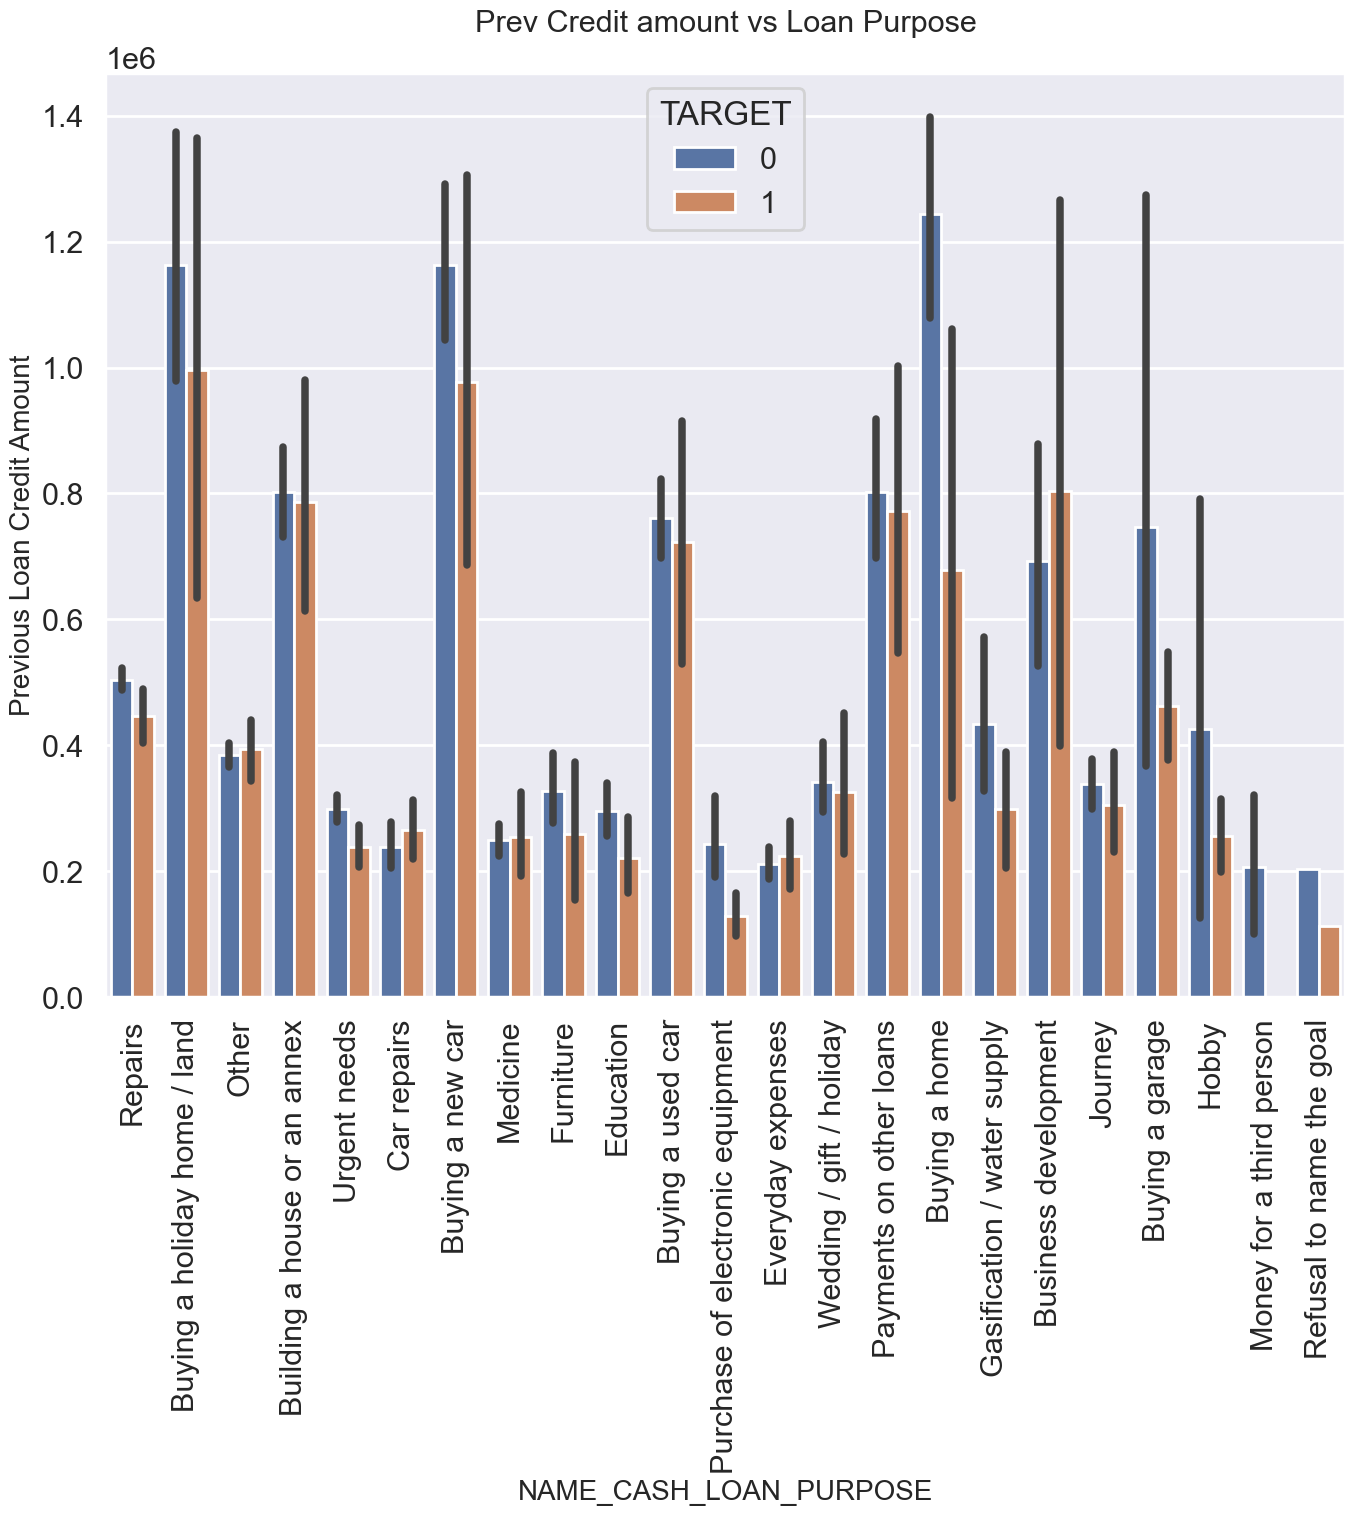

In [107]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_merged_1, y='AMT_CREDIT_y',hue='TARGET',x='NAME_CASH_LOAN_PURPOSE')
plt.title('Prev Credit amount vs Loan Purpose')
plt.ylabel('Previous Loan Credit Amount')
plt.show()

Points to be taken from the graph:-
1. Loan reasons like Buying a holiday home, buying a home and buying a new car has a lot of high credit amount.
2. Reasons like Purchase of electronic equipments, everday expenses, medicine and car repaires have a lot credit amount.
3. For most cases the credit amount of defaulters is lesser than the credit amount of non defaulters according to previous applications.
4. Reasons like business development, medicine, car repairs are areas where the defaulters have a higher credit amount than the non defaulters.

## Conclusions from the study

1. It is safer to give loans to Commercial associates, Pensioners and state servants than working people since they have a lower chance of defaulting. This may be due to their higher and more secure income.
2. It is safer to give loans to females than males.
3. It is safer to give loans to Managers, Accountants and high level staff members(Core, High Skill Tech, Medicine) than Labourers, sales staff, drivers and other lower staff members which makes sense that they have a higher income and better financial security.
3. It is safer to give loans to people having a higher level of education than those who have secondary, lower secondary or incomplete educational background.
4. For Loan purposes such as business development, medicine, car repairs, we should be careful providing a high loan amount as it might lead to a default.


# Thanks

##### Date: 21 December 2020